<div style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align:center;
                 font-family: Trebuchet MS;">Machine Learning Project for Appliances Energy Prediction 
    </h1>
</div>

<div style="width:100%;text-align: center;"> 
    <img align=middle src="https://www.dataquest.io/wp-content/uploads/2019/05/what-is-data-science-1.jpg" alt="Data Science" style="height:500px;margin-top:2rem;">
</div>

### Background
The KAG Energy Data is an experimental data obtained from energy usage from appliances in a low energy building.
The data set was collected at 10 min intervals for about 4 and half months. The house temp_paramserature and hum_params conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temp_paramserature and hum_params conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

### Dataset Source
The KAG Energy Data source is from [Kaggle](https://www.kaggle.com/datasets/loveall/appliances-energy-prediction).

### Objectives
To predict energy appliance consumption using the KAG Energy data. This is a regression problem.




<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">1. Imports
    </h2>
</div>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mutual_info_score, mean_squared_error, r2_score
from sklearn.tree import export_text
import bentoml
import pickle
%matplotlib inline
pd.set_option('display.max_columns', 500)

<div id='plot-configuration'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">2. Plot Configuration
    </h2>
</div>

In [3]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
font = {'family':'Helvetica, Ariel',
        'weight':'normal',
        'size':12}
plt.rc('font', **font)
sns.set(rc={"figure.dpi": 100, 'savefig.dpi': 100})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set_palette("Accent")
FIG_FONT = dict(family="sans serif", weight="bold", color="#BA4A00")

<div id='loading-dataset'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">3. Loading Dataset
    </h2>
</div>
Let's first check the dataset to get the first insight.

In [4]:
energy_df = pd.read_csv("KAG_energydata_complete.csv")
energy_df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4       RH_4         T5   RH_5        T6  \
0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   

        RH_6         T7       RH_7    T8       RH_8         T9   RH_9  \
0  84.256667  17.200000  41.626667  18.2  48.900000  17.033333  45.53   
1  84.063333  17.200000  41.560000  18.2  48.863333  17.066667  45.56   
2  83.156667  17.200000  41.433333  18.2  48.730000  17.000000  45.50   
3  83.423333  17.133333  41.290000  18.1  48.590000  17.000000  45.40   
4  84.893333  17.200000  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0  6.600000        733.5    92.0   7.000000   63.000000        5.3  13.275433   
1  6.483333        733.6    92.0   6.666667   59.166667        5.2  18.606195   
2  6.366667        733.7    92.0   6.333333   55.333333        5.1  28.642668   
3  6.250000        733.8    92.0   6.000000   51.500000        5.0  45.410389   
4  6.133333        733.9    92.0   5.666667   47.666667        4.9  10.084097   

         rv2  
0  13.275433  
1  18.606195  
2  28.642668  
3  45.410389  
4  10.084097

In [5]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
energy_df.shape

(19735, 29)

<div id='understanding-the-data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">4. Understanding the Data
    </h2>
</div>

Dataset consists of 29 features.
1. **date time**: year-month-day hour:minute:second
2. **Appliances**: energy use in Wh
3. **lights**: energy use of light fixtures in the house in Wh
4. **T1**: temp_paramserature in kitchen area, in Celsius
5. **RH1**: hum_params in kitchen area, in % 
6. **T2**: temp_paramserature in living room area, in Celsius 
7. **RH2**: hum_params in living room area, in %
8. **T3**: temp_paramserature in laundry room area
9. **RH3**: hum_params in laundry room area, in %.
10. **T4**: temp_paramserature in office room, in Celsius.
11. **RH4**: hum_params in office room, in %
12. **T5**: temp_paramserature in bathroom, in Celsius
13. **RH5**: hum_params in bathroom, in % 
14. **T6**: temp_paramserature outside the building (north side), in Celsius 
15. **RH6**: hum_params outside the building (north side), in %
16. **T7**: temp_paramserature in ironing room , in Celsius
17. **RH7**: hum_params in ironing room, in % 
18. **T8**: temp_paramserature in teenager room 2, in Celsius 
19. **RH8**: hum_params in teenager room 2, in %
20. **T9**: temp_paramserature in parents room, in Celsius
21. **RH9**: hum_params in parents room, in % 
22. **To**: temp_paramserature outside (from Chievres weather station), in Celsius 
23. **Pressure**: (from Chievres weather station), in mm Hg 
24. **RHout**: hum_params outside (from Chievres weather station), in %
25. **Wind speed**: (from Chievres weather station), in m/s
26. **Visibility**: (from Chievres weather station), in km
27. **Tdewpoint**: (from Chievres weather station), Â°C
28. **rv1**: Random variable 1, nondimensional
29. **rv2**: Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

<div id='exploratory-data-analysis'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5. Exploratory Data Analysis
    </h2>
</div>

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.1 Checking Null Values
    </h3>
</div>

First, let's check the dataset if it contains any null values.

In [7]:
energy_df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
energy_df.duplicated().sum()

0

In [9]:
energy_df.columns = energy_df.columns.str.lower()

In [10]:
energy_df.describe().round()

appliances   lights       t1     rh_1       t2     rh_2       t3  \
count     19735.0  19735.0  19735.0  19735.0  19735.0  19735.0  19735.0   
mean         98.0      4.0     22.0     40.0     20.0     40.0     22.0   
std         103.0      8.0      2.0      4.0      2.0      4.0      2.0   
min          10.0      0.0     17.0     27.0     16.0     20.0     17.0   
25%          50.0      0.0     21.0     37.0     19.0     38.0     21.0   
50%          60.0      0.0     22.0     40.0     20.0     40.0     22.0   
75%         100.0      0.0     23.0     43.0     22.0     43.0     23.0   
max        1080.0     70.0     26.0     63.0     30.0     56.0     29.0   

          rh_3       t4     rh_4       t5     rh_5       t6     rh_6       t7  \
count  19735.0  19735.0  19735.0  19735.0  19735.0  19735.0  19735.0  19735.0   
mean      39.0     21.0     39.0     20.0     51.0      8.0     55.0     20.0   
std        3.0      2.0      4.0      2.0      9.0      6.0     31.0      2.0   
min       29.0     15.0     28.0     15.0     30.0     -6.0      1.0     15.0   
25%       37.0     20.0     36.0     18.0     45.0      4.0     30.0     19.0   
50%       39.0     21.0     38.0     19.0     49.0      7.0     55.0     20.0   
75%       42.0     22.0     42.0     21.0     54.0     11.0     83.0     22.0   
max       50.0     26.0     51.0     26.0     96.0     28.0    100.0     26.0   

          rh_7       t8     rh_8       t9     rh_9    t_out  press_mm_hg  \
count  19735.0  19735.0  19735.0  19735.0  19735.0  19735.0      19735.0   
mean      35.0     22.0     43.0     19.0     42.0      7.0        756.0   
std        5.0      2.0      5.0      2.0      4.0      5.0          7.0   
min       23.0     16.0     30.0     15.0     29.0     -5.0        729.0   
25%       32.0     21.0     39.0     18.0     38.0      4.0        751.0   
50%       35.0     22.0     42.0     19.0     41.0      7.0        756.0   
75%       39.0     23.0     47.0     21.0     44.0     10.0        761.0   
max       51.0     27.0     59.0     24.0     53.0     26.0        772.0   

        rh_out  windspeed  visibility  tdewpoint      rv1      rv2  
count  19735.0    19735.0     19735.0    19735.0  19735.0  19735.0  
mean      80.0        4.0        38.0        4.0     25.0     25.0  
std       15.0        2.0        12.0        4.0     14.0     14.0  
min       24.0        0.0         1.0       -7.0      0.0      0.0  
25%       70.0        2.0        29.0        1.0     12.0     12.0  
50%       84.0        4.0        40.0        3.0     25.0     25.0  
75%       92.0        6.0        40.0        7.0     38.0     38.0  
max      100.0       14.0        66.0       16.0     50.0     50.0

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.2 Transforming the date feature into datetime
    </h3>
</div>

In [11]:
energy_df['date'] = pd.to_datetime(energy_df['date'])

def extract_dates(data=None, date_cols=None, subset=None, drop=True):
    df = data
    for date_col in date_cols:
        #Convert date feature to Pandas DateTime
        df[date_col ]= pd.to_datetime(df[date_col])

        #specify columns to return
        dict_dates = {  "dow":  df[date_col].dt.weekday,
                        "dom": df[date_col].dt.day,
                        "doy":   df[date_col].dt.dayofyear,
                        "hr": df[date_col].dt.hour,
                        "min":   df[date_col].dt.minute,
                        "is_wkd":  df[date_col].apply(lambda x : 1 if x  in [5,6] else 0 ),
                        "wkoyr": df[date_col].dt.isocalendar().week,
                        "mth": df[date_col].dt.month,
                        "qtr":  df[date_col].dt.quarter,
                        "yr": df[date_col].dt.year
                    } 

        if subset is None:
            #return all features
            subset = ['dow', 'dom', 'doy', 'hr', 'min', 'is_wkd', 'wkoyr', 'mth', 'qtr', 'yr']
            for date_ft in subset:
                df[date_col + '_' + date_ft] = dict_dates[date_ft]
        else:
            #Return only sepcified date features
            for date_ft in subset:
                df[date_col + '_' + date_ft] = dict_dates[date_ft]
                
    #Drops original time columns from the dataset
    if drop:
        df.drop(date_cols, axis=1, inplace=True)

    return df

energy_df = extract_dates(data = energy_df, date_cols = ['date'])
energy_df[:5]

appliances  lights     t1       rh_1    t2       rh_2     t3       rh_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          t4       rh_4         t5   rh_5        t6       rh_6         t7  \
0  19.000000  45.566667  17.166667  55.20  7.026667  84.256667  17.200000   
1  19.000000  45.992500  17.166667  55.20  6.833333  84.063333  17.200000   
2  18.926667  45.890000  17.166667  55.09  6.560000  83.156667  17.200000   
3  18.890000  45.723333  17.166667  55.09  6.433333  83.423333  17.133333   
4  18.890000  45.530000  17.200000  55.09  6.366667  84.893333  17.200000   

        rh_7    t8       rh_8         t9   rh_9     t_out  press_mm_hg  \
0  41.626667  18.2  48.900000  17.033333  45.53  6.600000        733.5   
1  41.560000  18.2  48.863333  17.066667  45.56  6.483333        733.6   
2  41.433333  18.2  48.730000  17.000000  45.50  6.366667        733.7   
3  41.290000  18.1  48.590000  17.000000  45.40  6.250000        733.8   
4  41.230000  18.1  48.590000  17.000000  45.40  6.133333        733.9   

   rh_out  windspeed  visibility  tdewpoint        rv1        rv2  date_dow  \
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433         0   
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195         0   
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668         0   
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389         0   
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097         0   

   date_dom  date_doy  date_hr  date_min  date_is_wkd  date_wkoyr  date_mth  \
0        11        11       17         0            0           2         1   
1        11        11       17        10            0           2         1   
2        11        11       17        20            0           2         1   
3        11        11       17        30            0           2         1   
4        11        11       17        40            0           2         1   

   date_qtr  date_yr  
0         1     2016  
1         1     2016  
2         1     2016  
3         1     2016  
4         1     2016

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">5.3 Making Visualizations
    </h3>
</div> 

In [12]:

def univariate_single_plot(df=energy_df, x=None, xlabel=None, rotation=None, bar_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, order=df[x].value_counts(ascending=True).index,)
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel=xlabel, size=14, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel="")
    if bar_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=1, fontname="sans serif", 
                        color="#7f7f7f")
    plt.title(label=f'{xlabel} Distribution', size=18, fontdict=FIG_FONT)
    plt.show()

def univariate_numerical_plot(df=energy_df, x=None, xlabel=None, bar_label=True):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.histplot(data=df, x=x, kde=True, ax=ax[0], color='#21618C')
    sns.boxplot(data=df, x=x, ax=ax[1], color='#884EA0')
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[1].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()

In [13]:
temp_params = ["t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9"]

hum_params = ["rh_1", "rh_2", "rh_3", "rh_4", "rh_5", "rh_6", "rh_7", "rh_8", "rh_9"]

weather_params = ["t_out", "tdewpoint", "rh_out", "press_mm_hg",
                "windspeed", "visibility"]

light_params = ["lights"]

random_params = ["rv1", "rv2"]

target = ["appliances"]

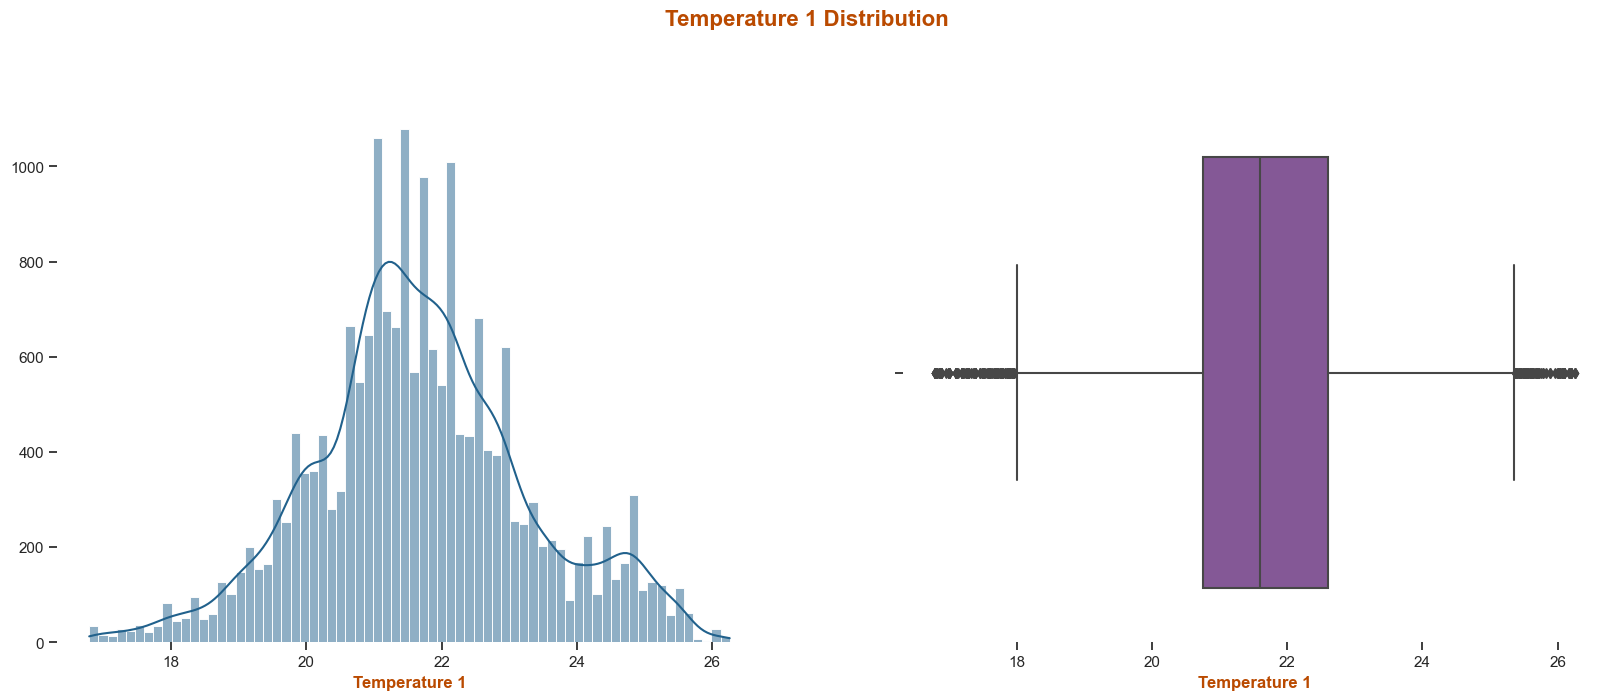

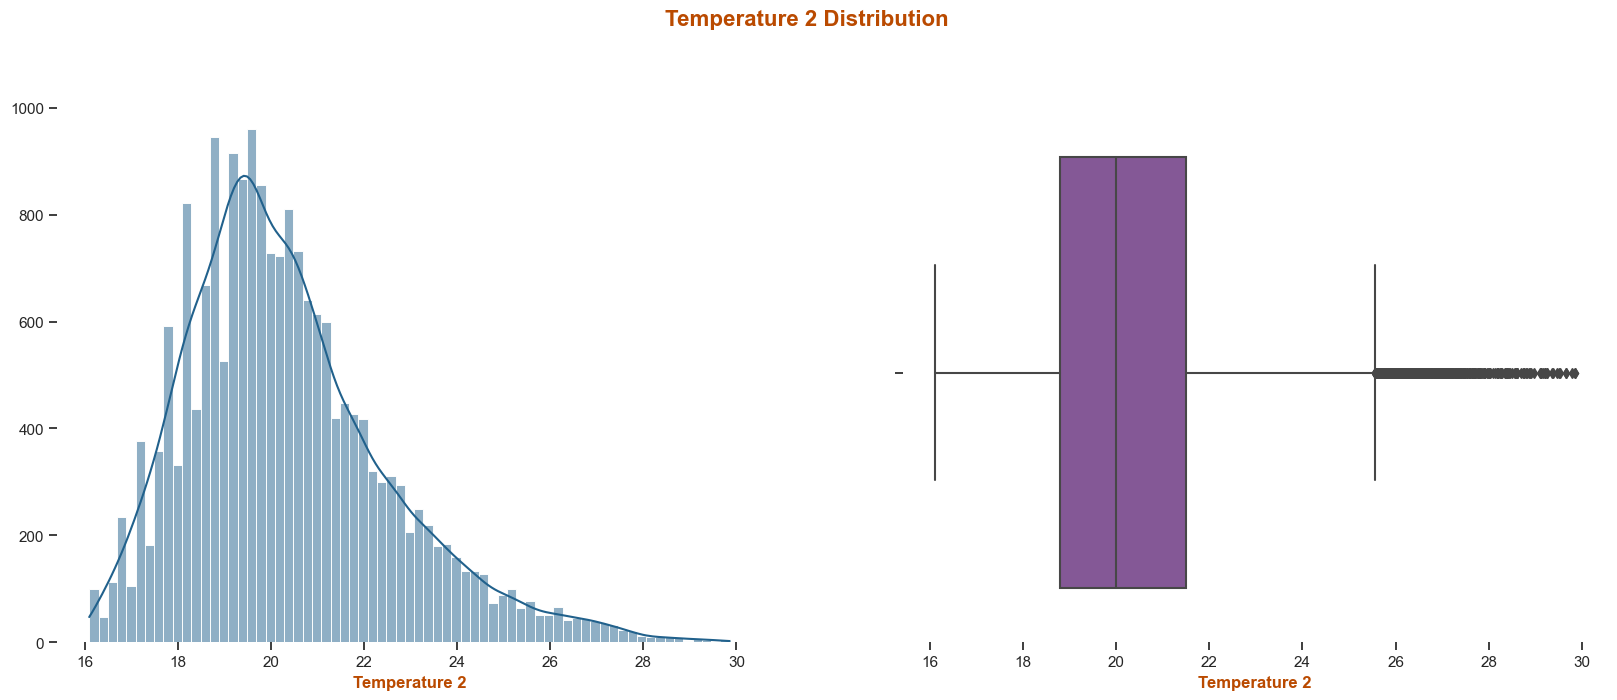

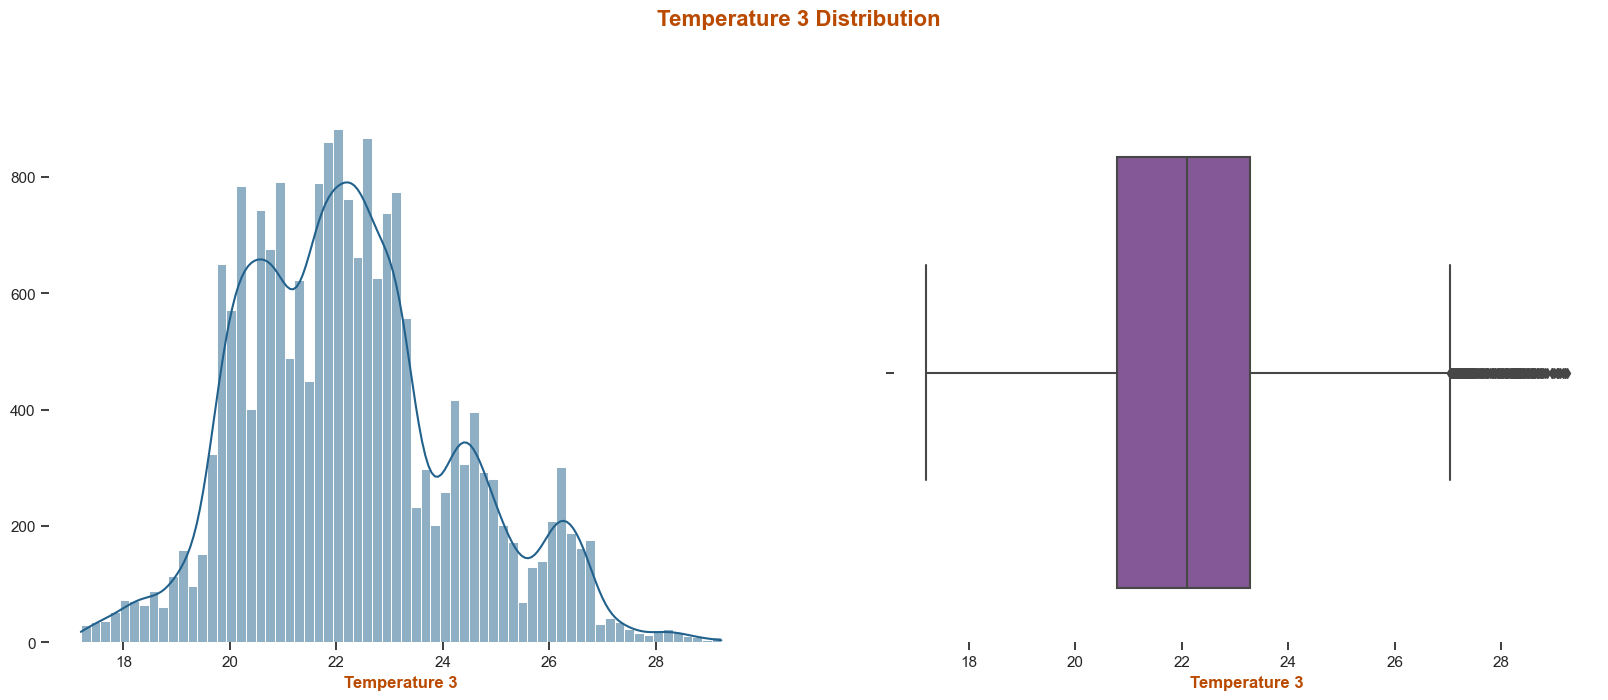

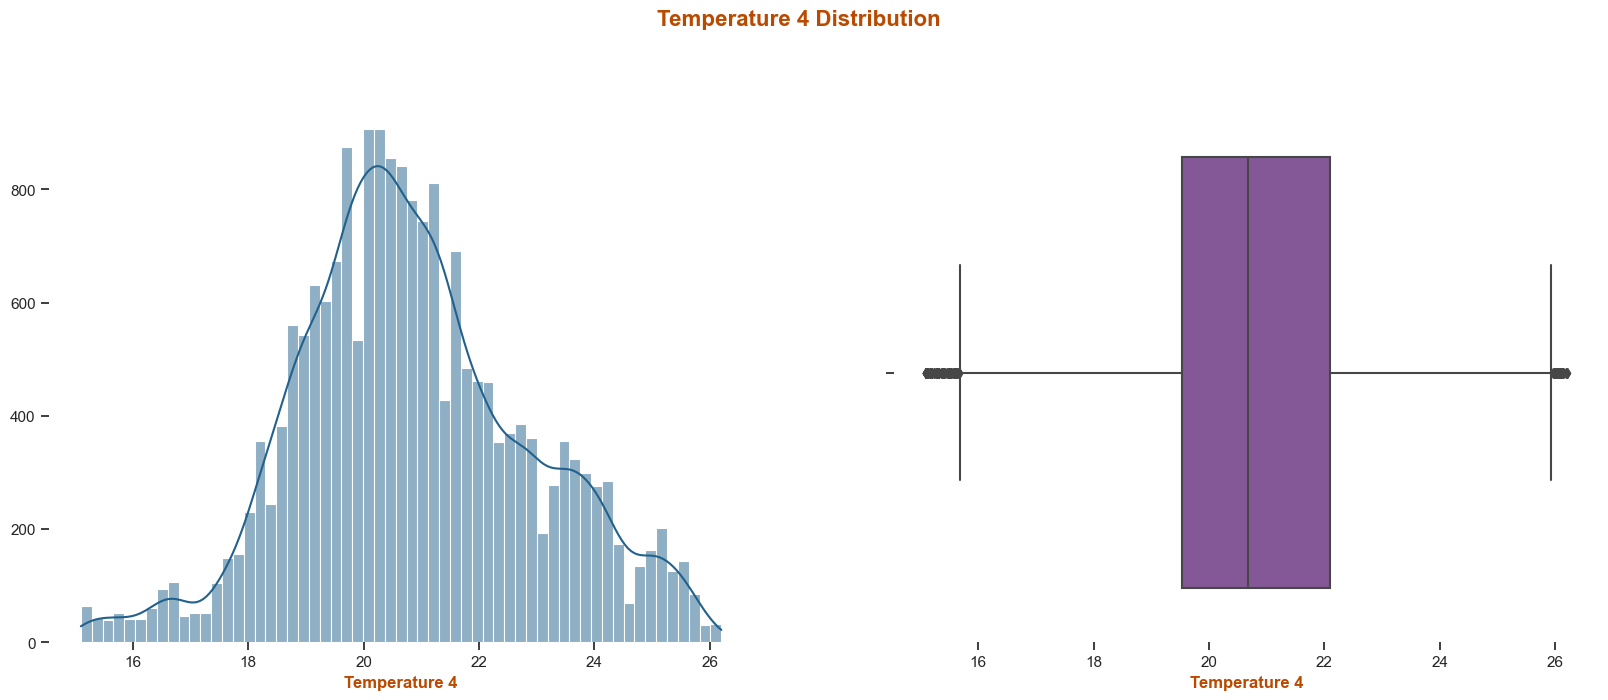

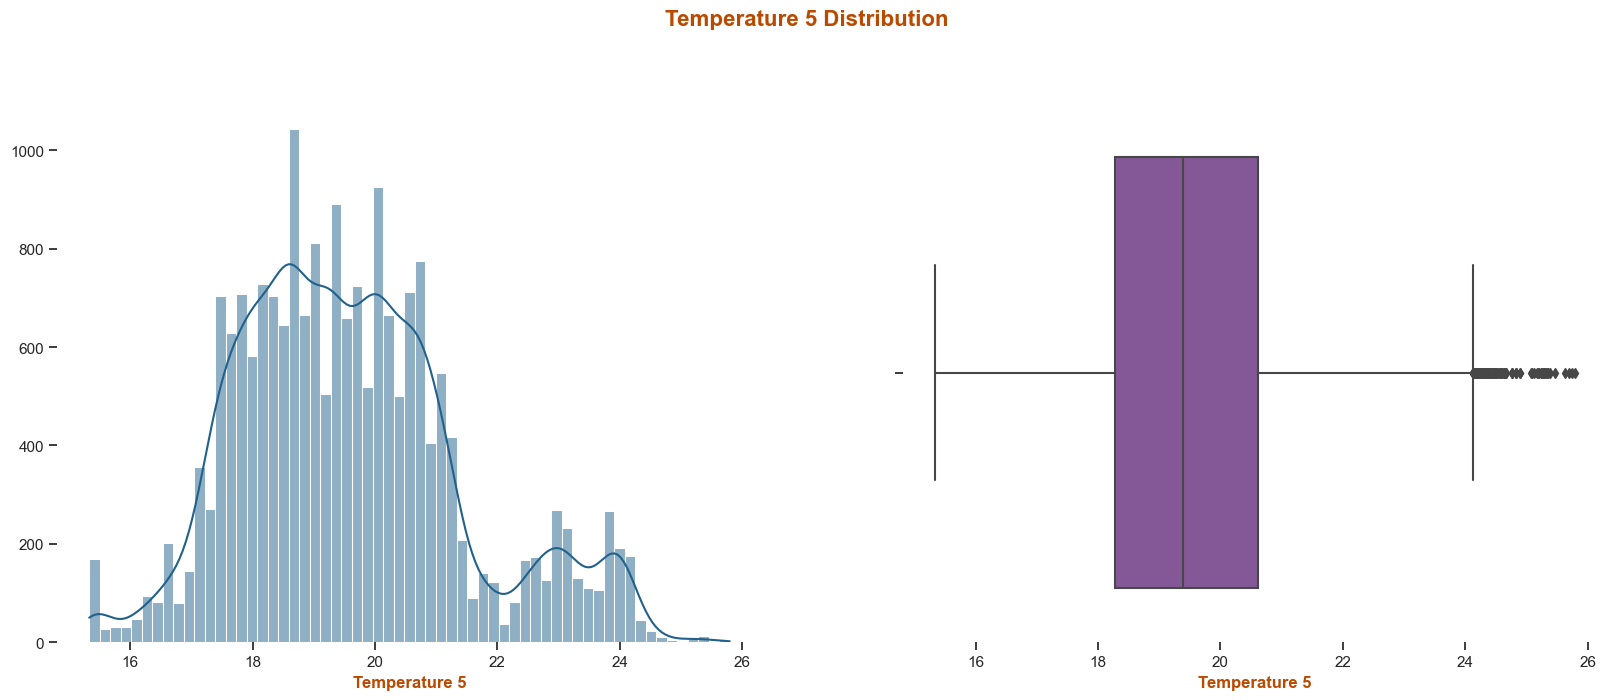

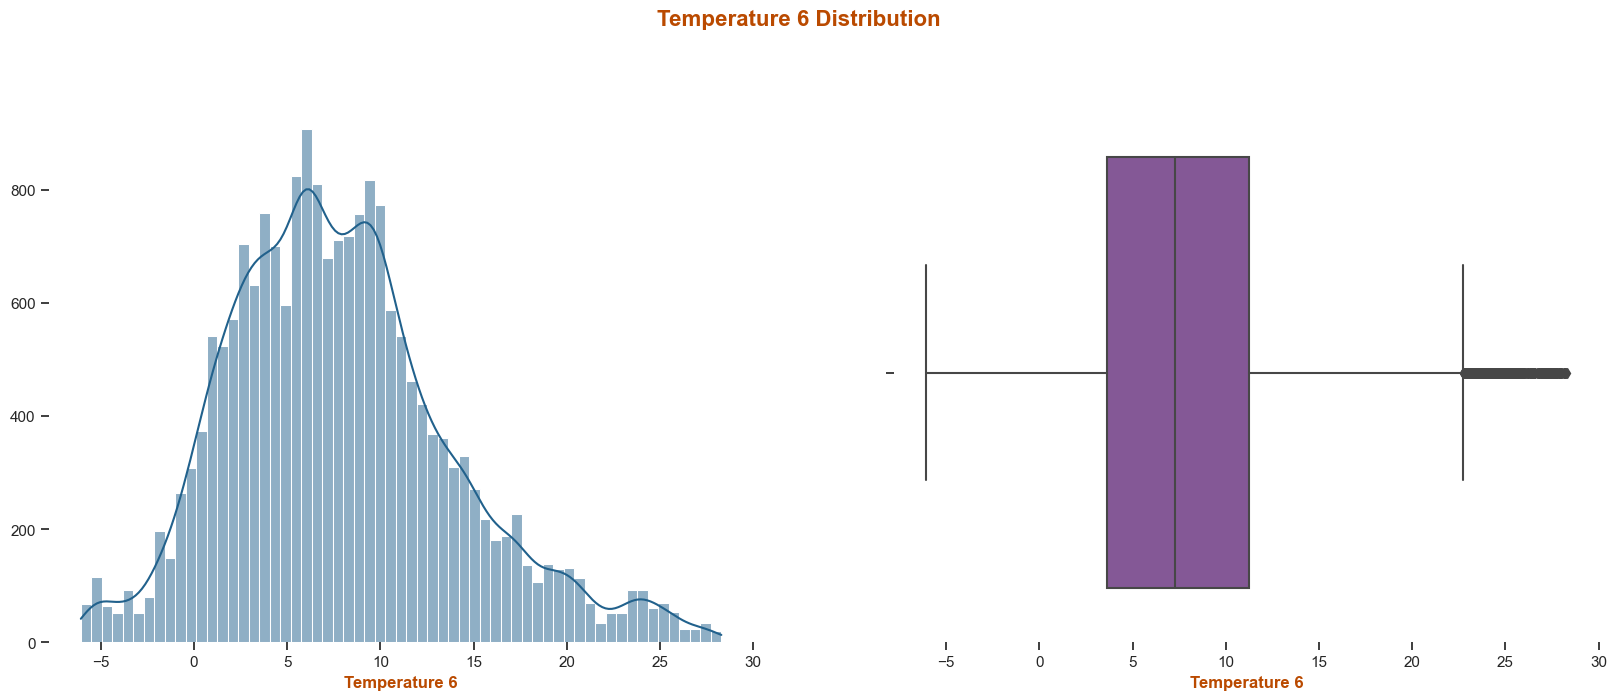

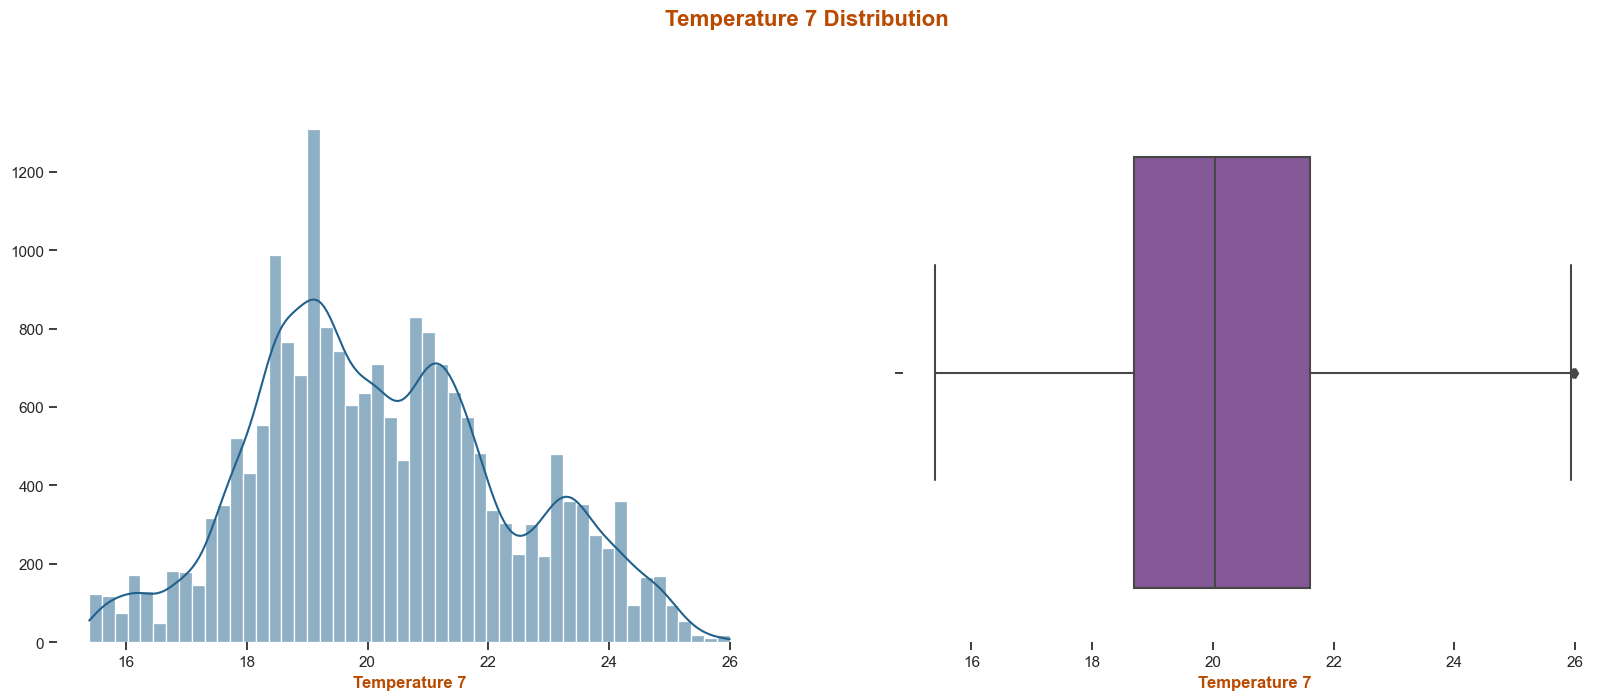

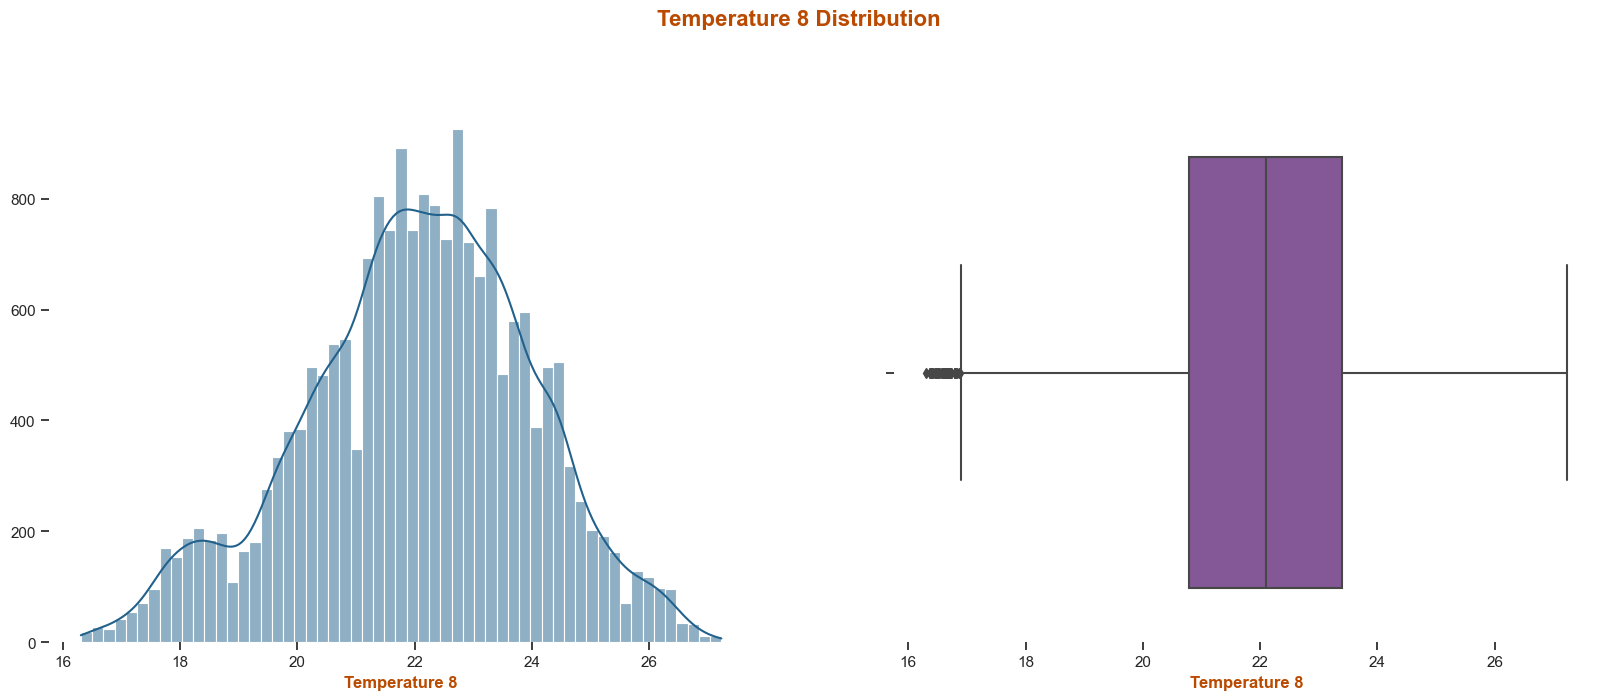

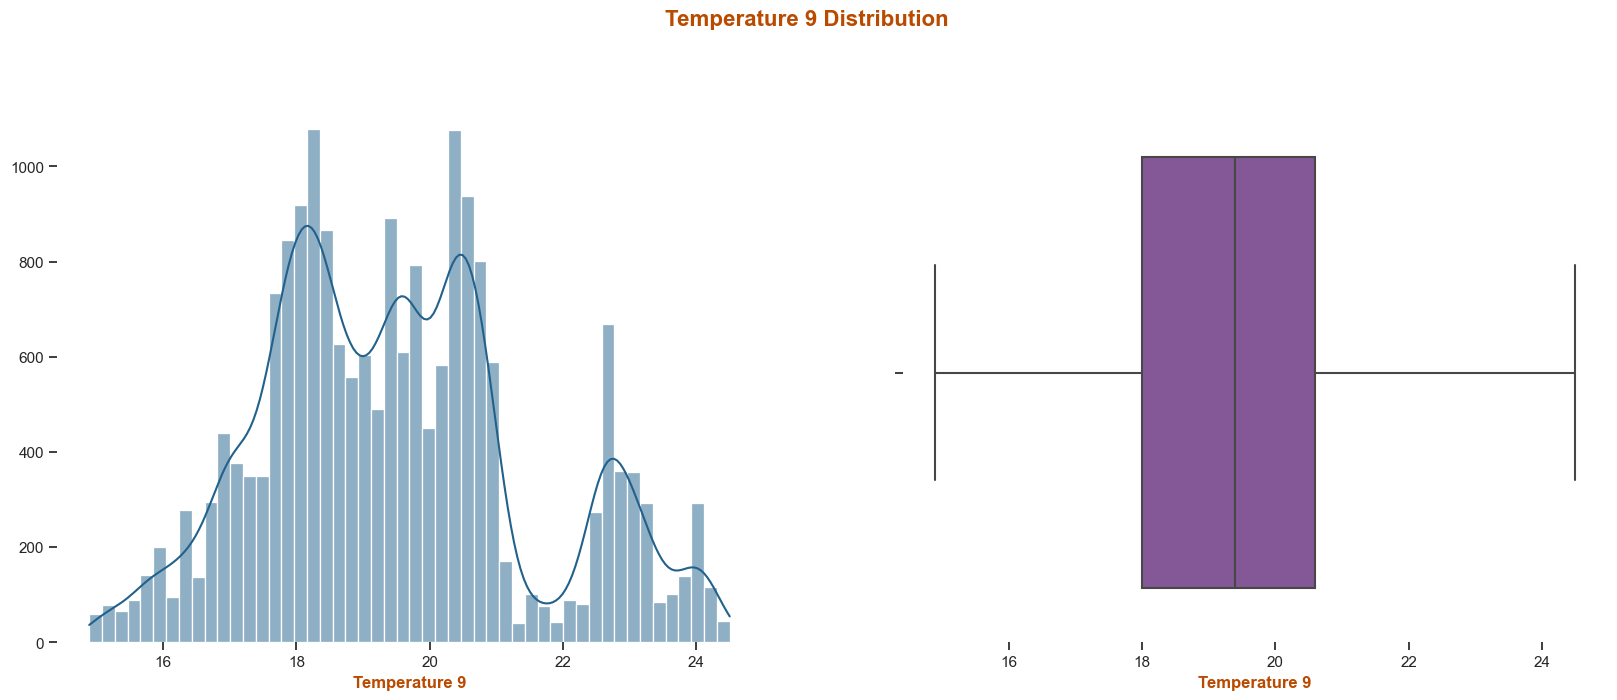

In [14]:
for i in temp_params:
    univariate_numerical_plot(energy_df, x=i, xlabel="Temperature " + i.split('t')[1])

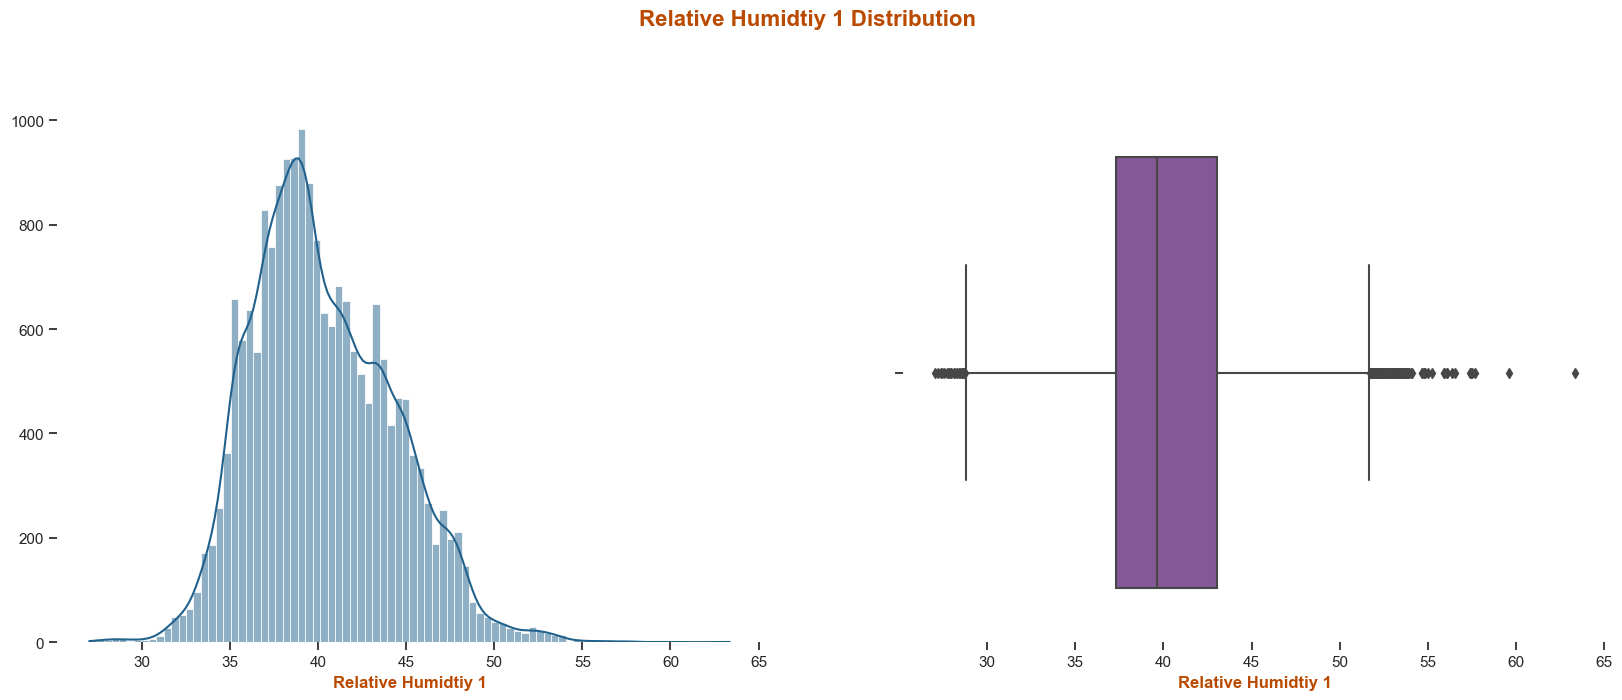

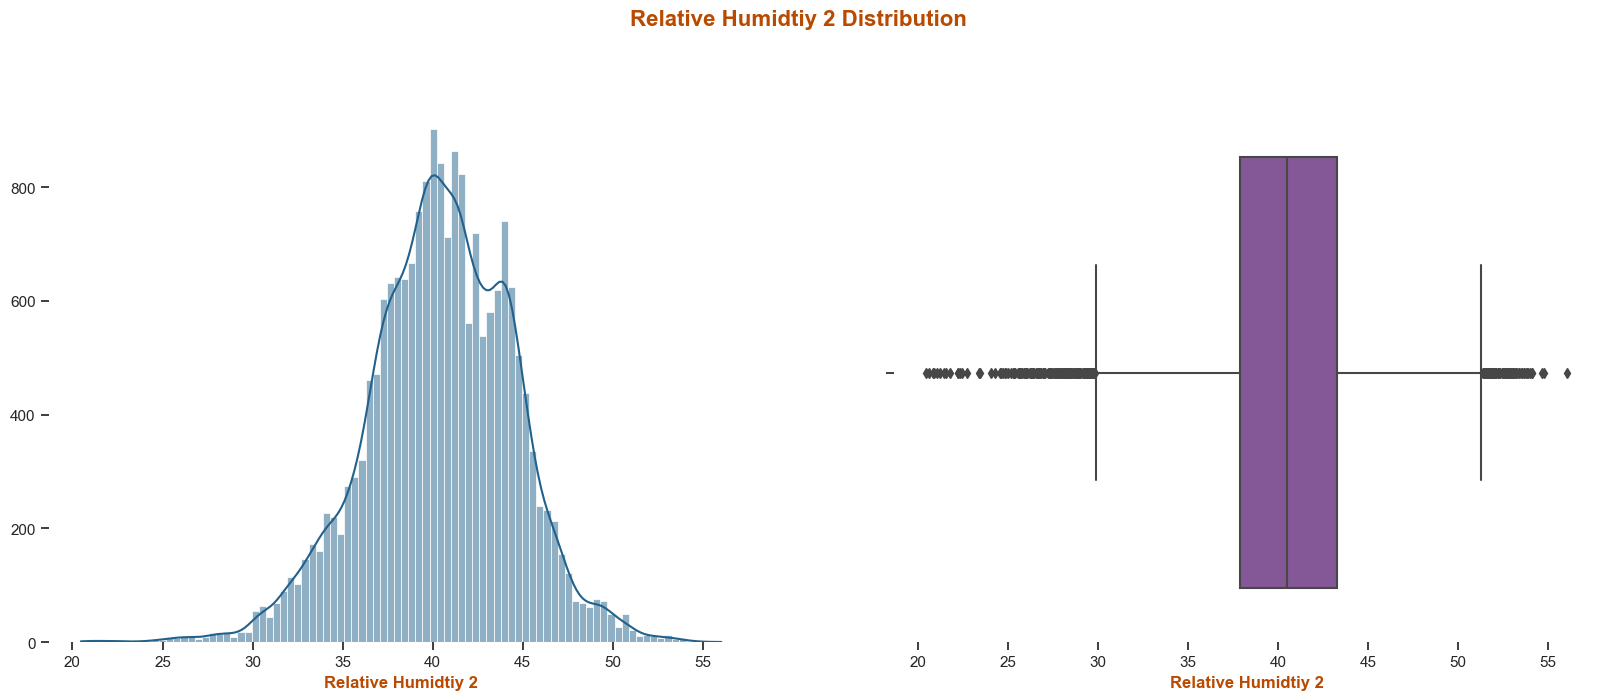

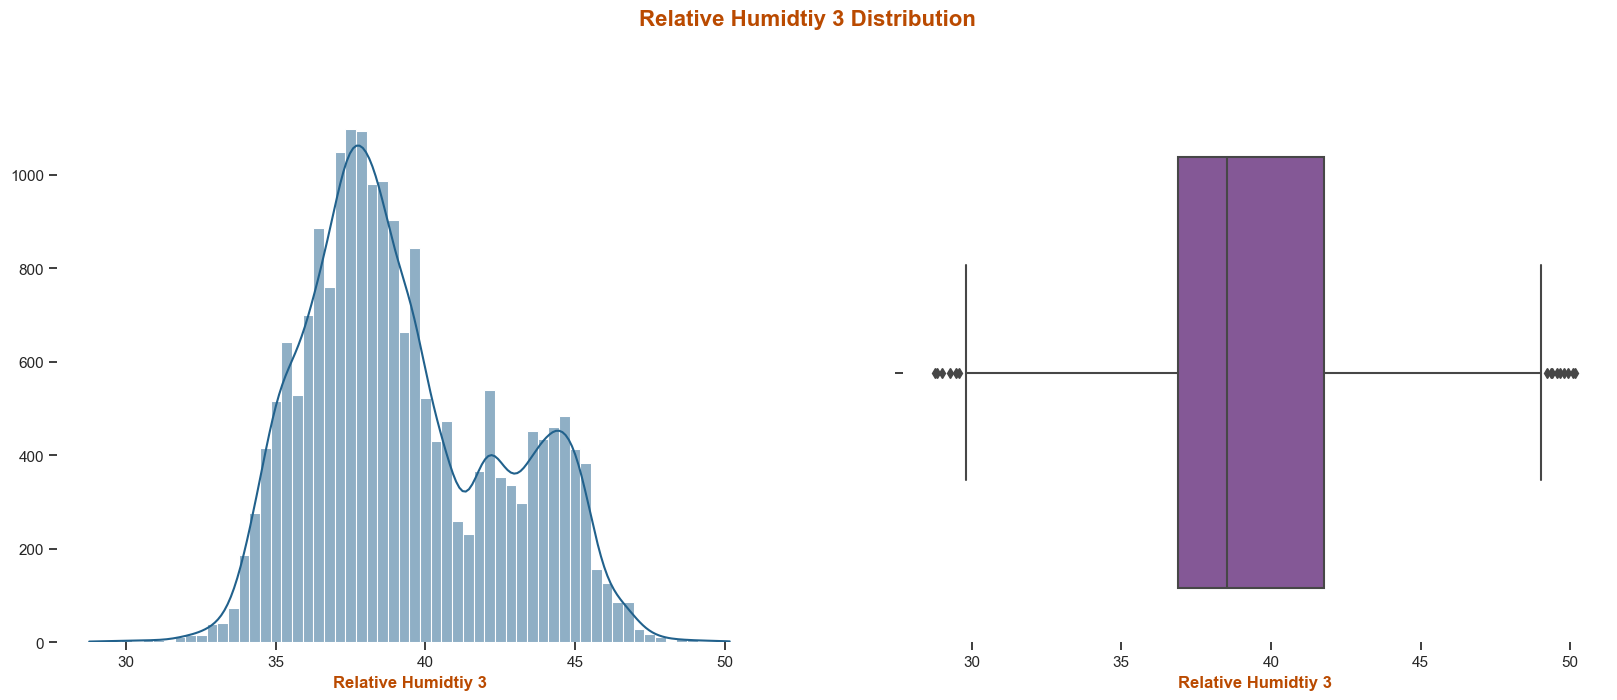

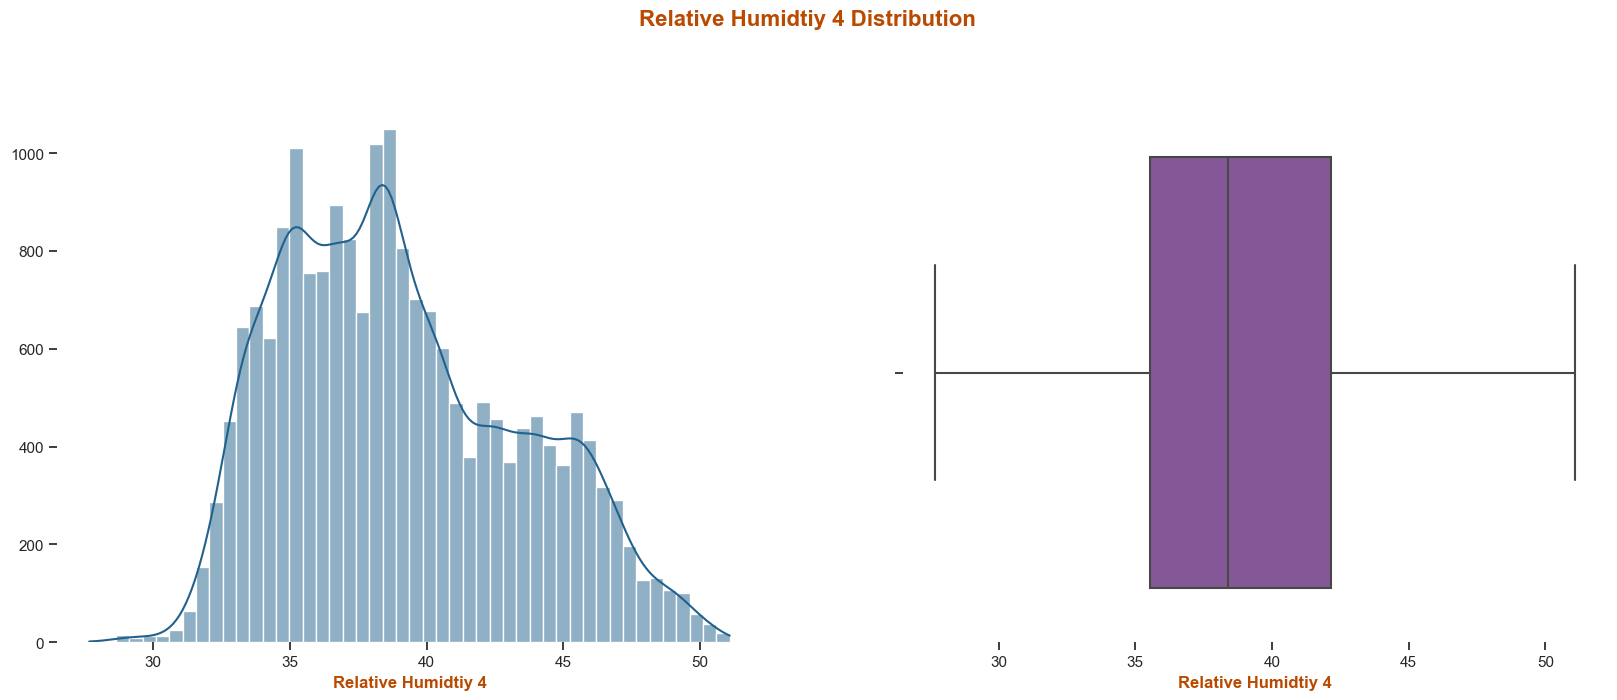

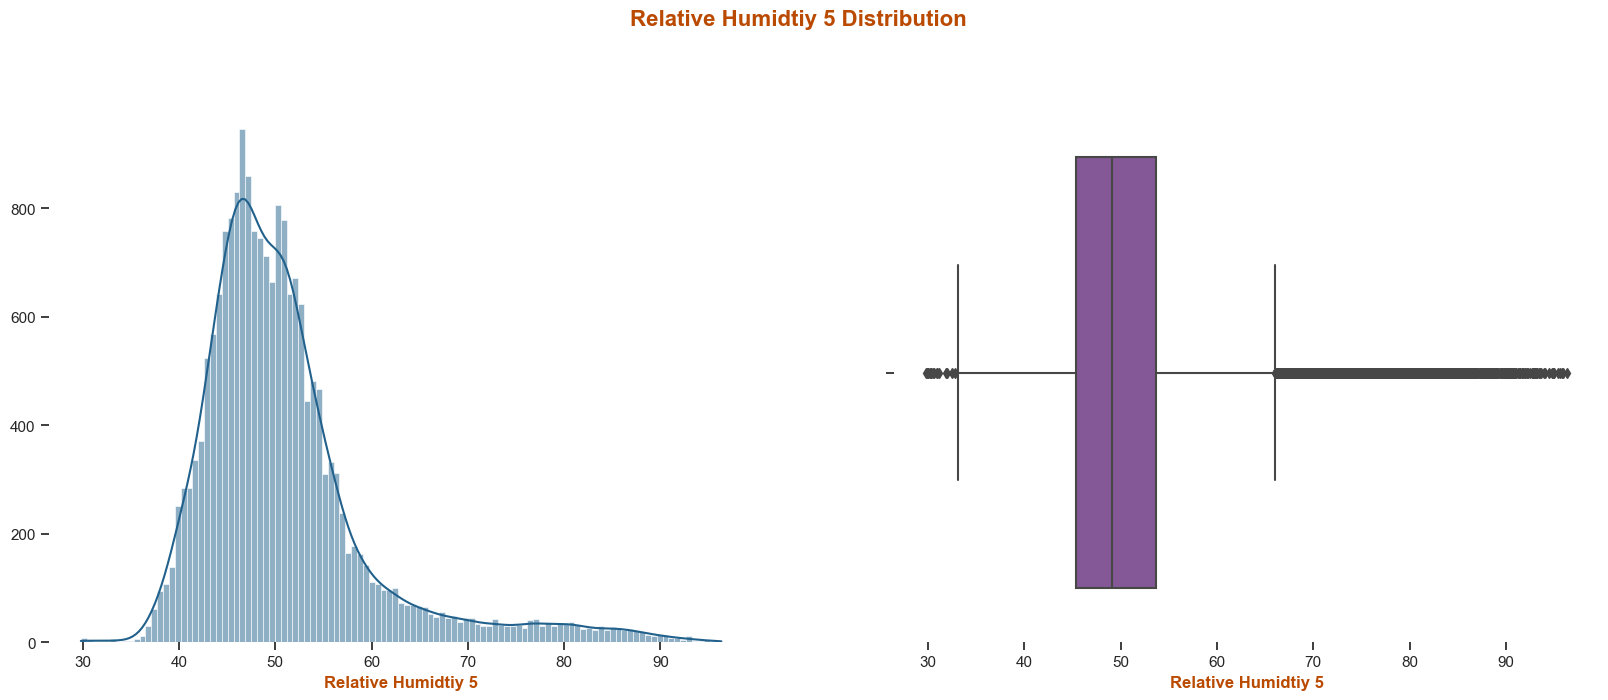

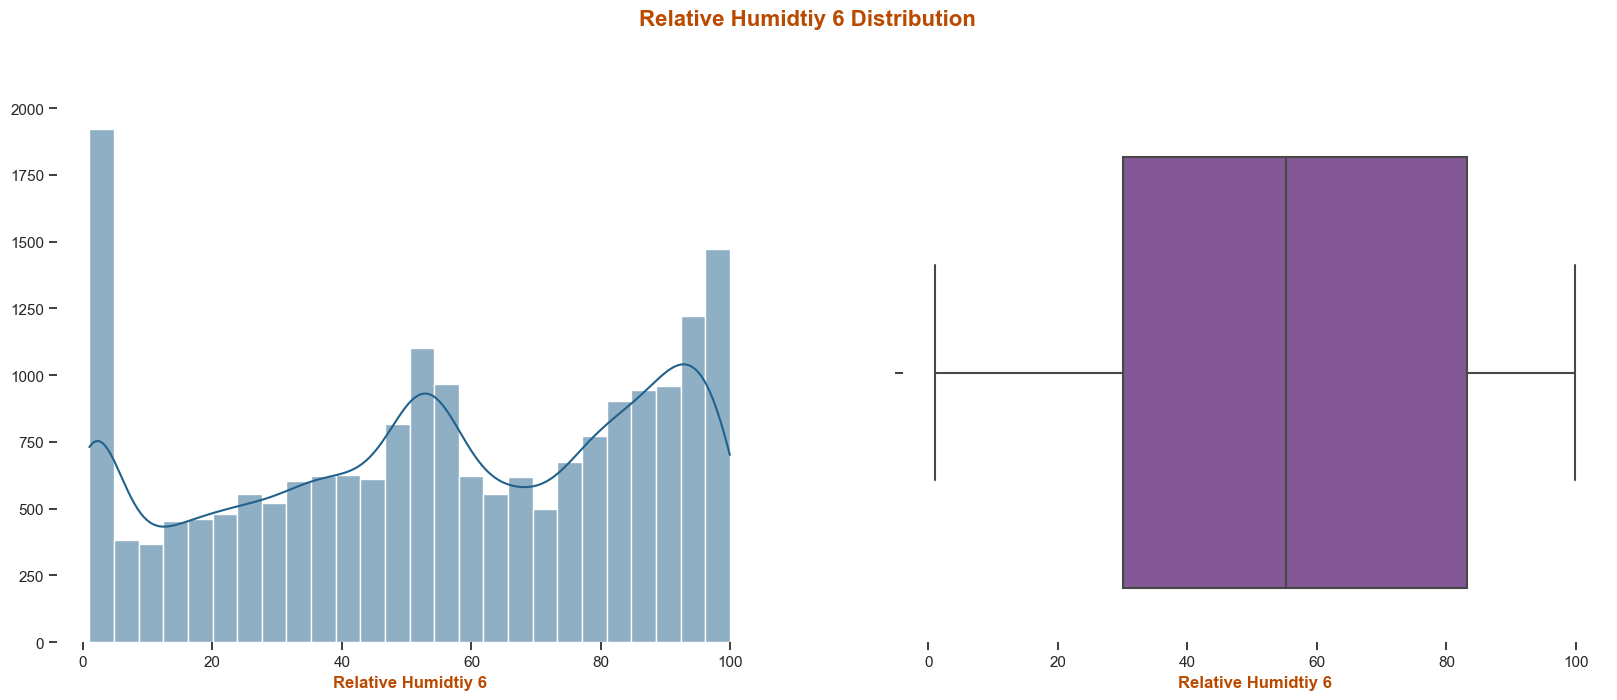

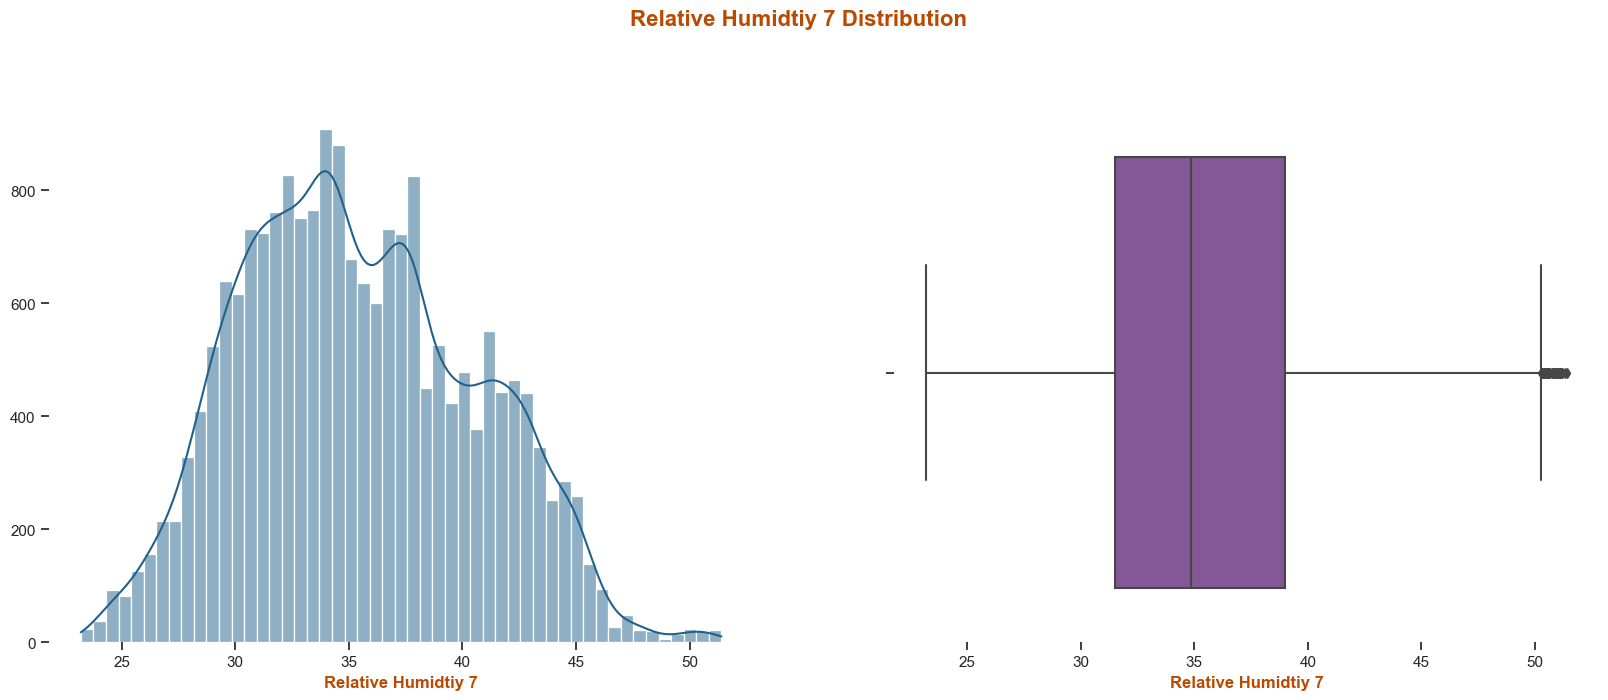

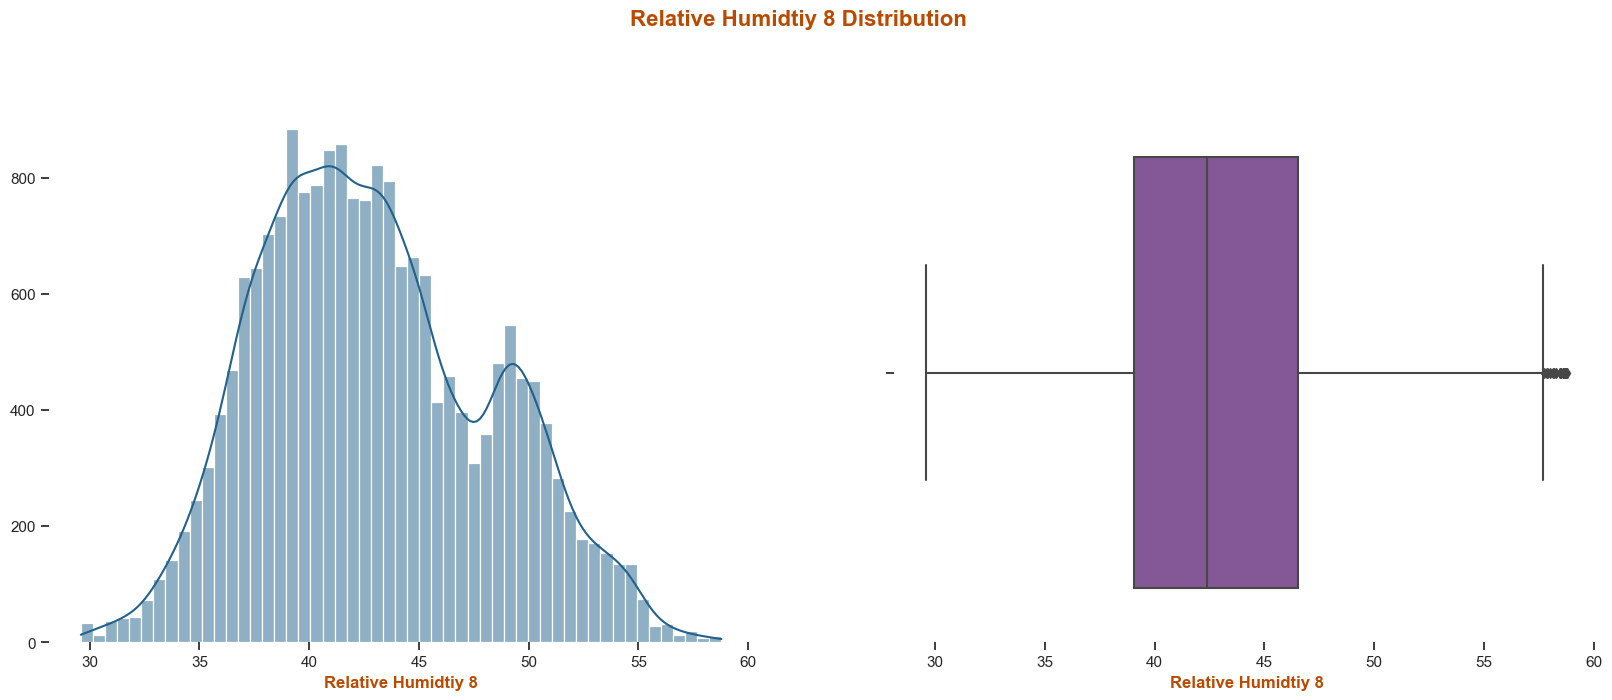

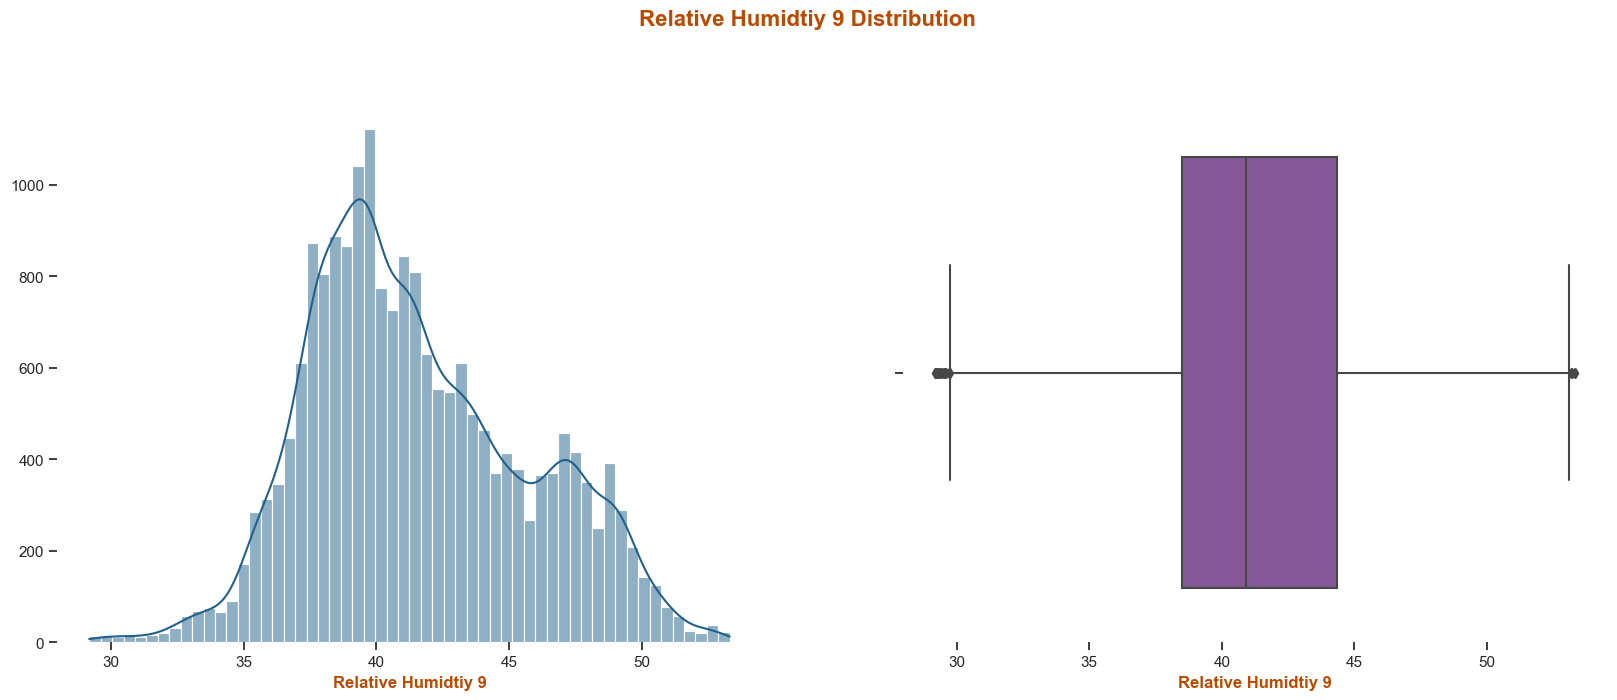

In [15]:
for i in hum_params:
    univariate_numerical_plot(energy_df, x=i, xlabel="Relative Humidtiy " + i.split('_')[1])

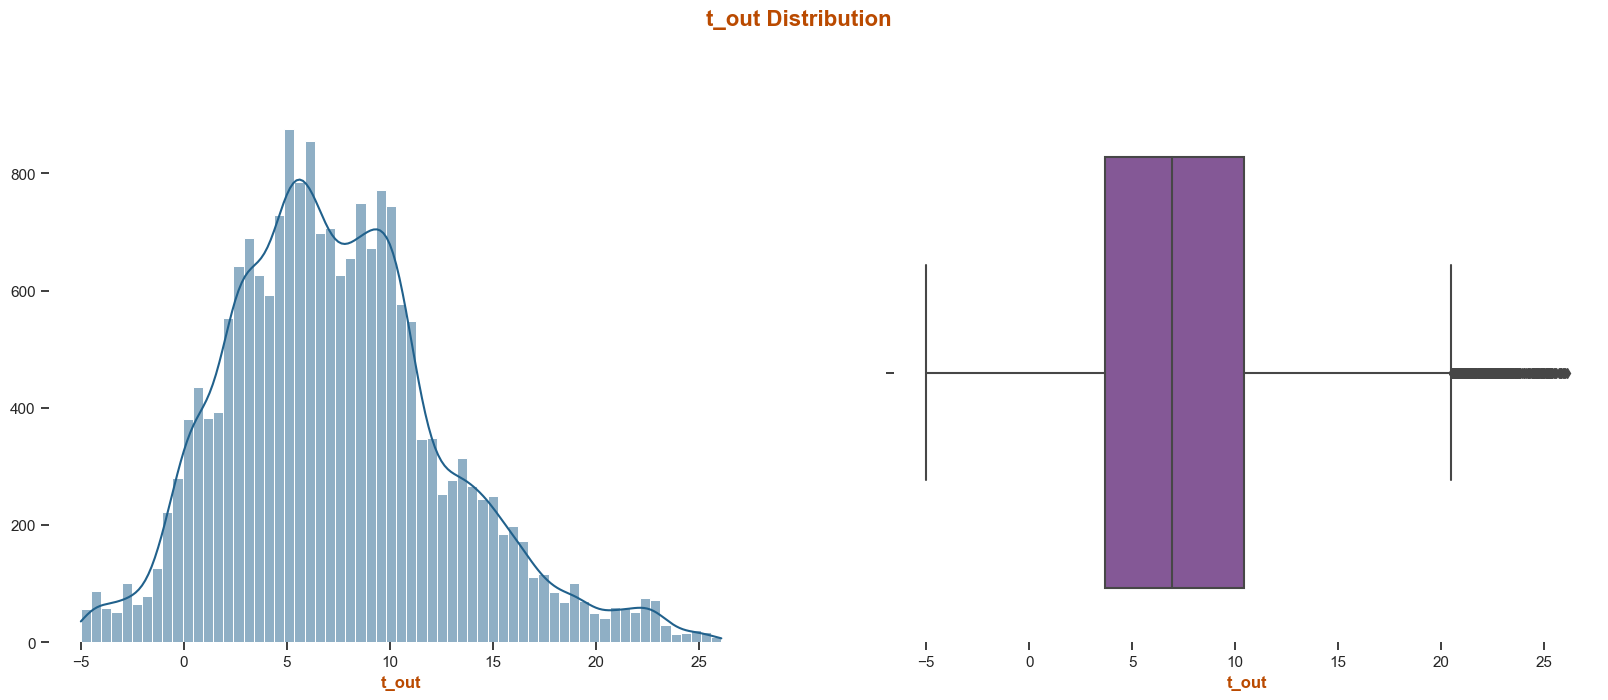

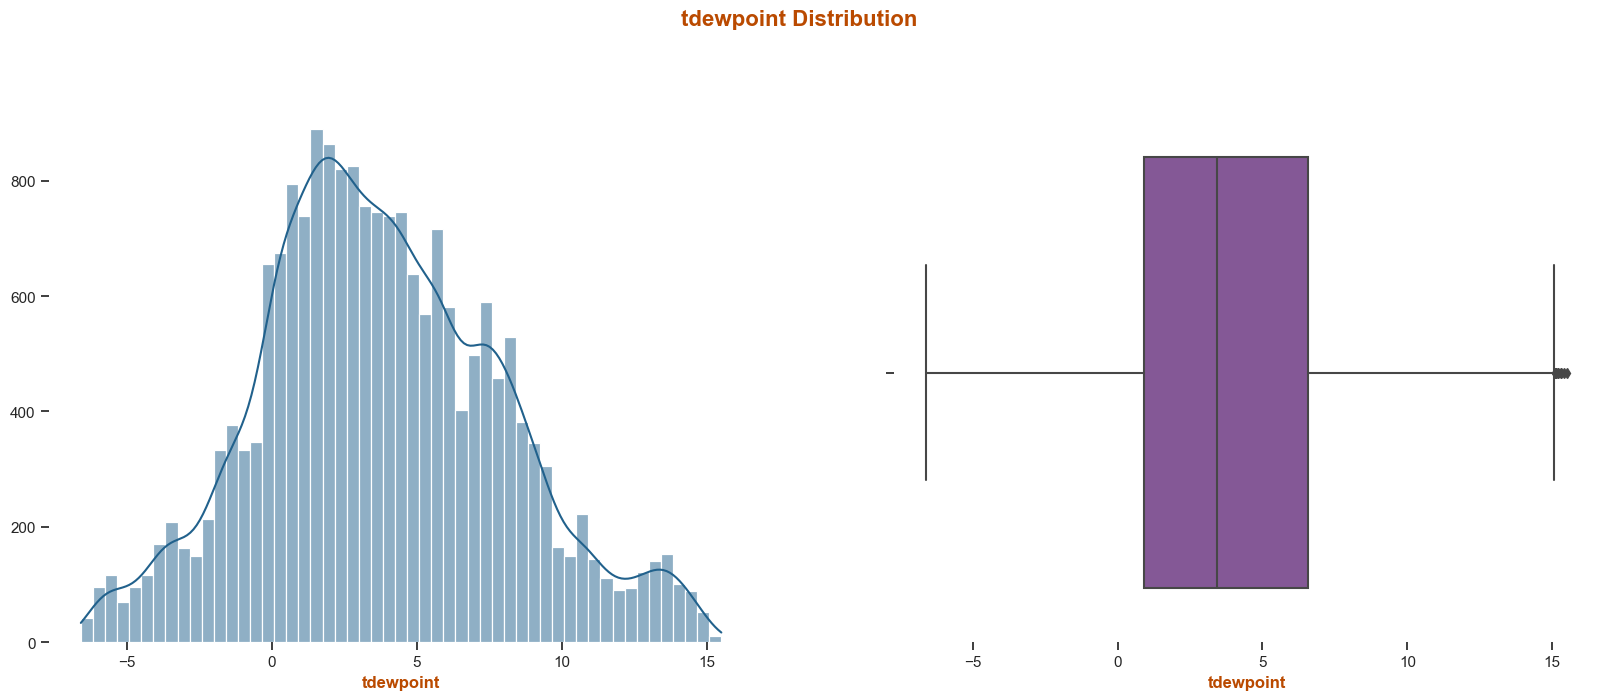

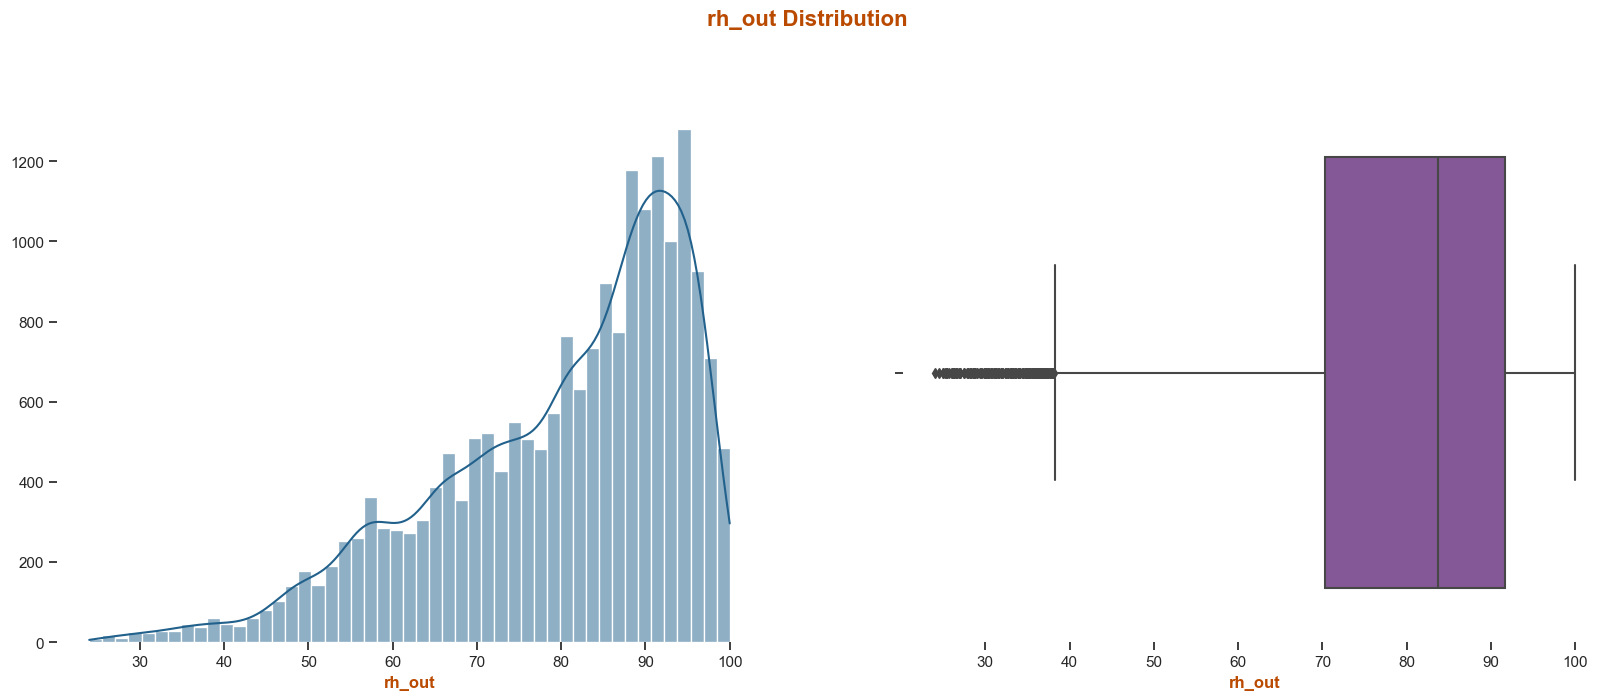

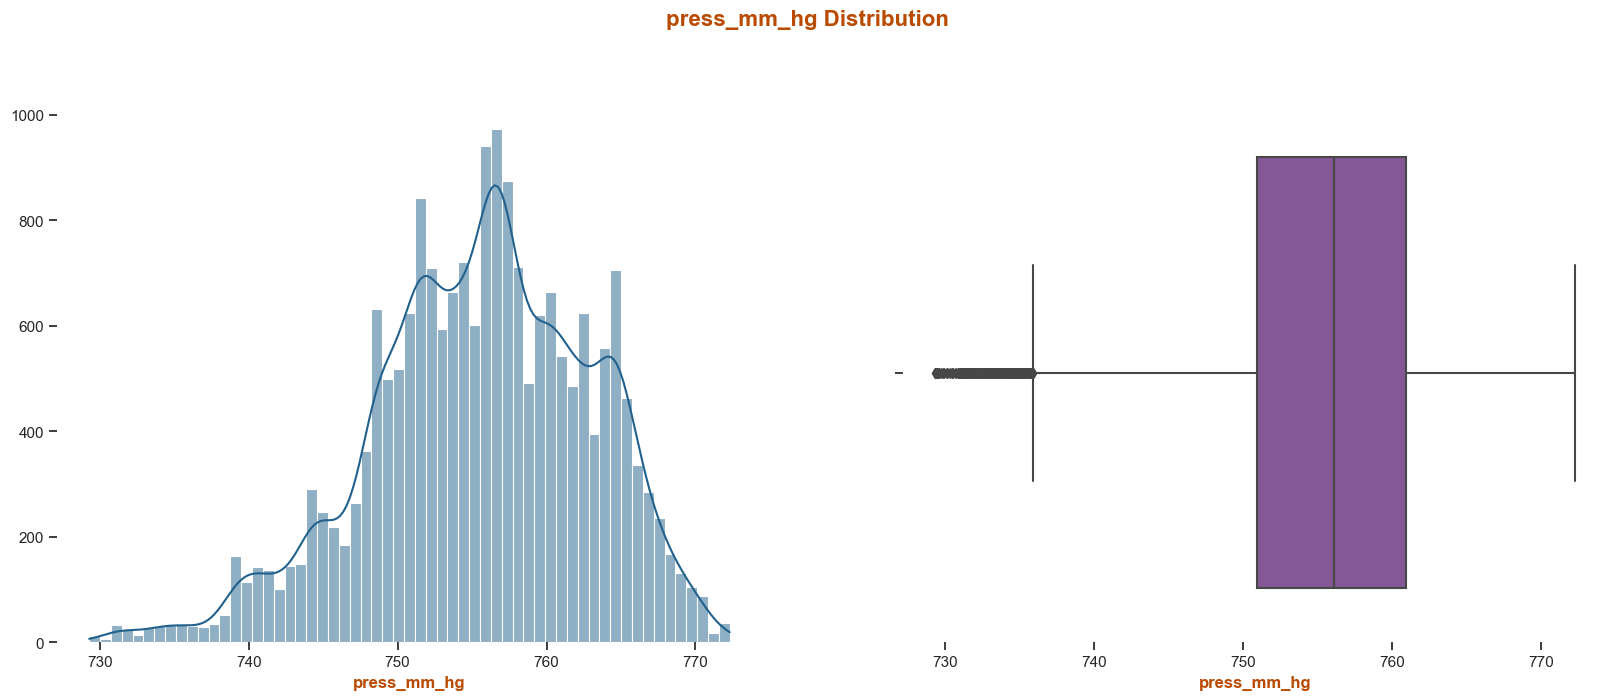

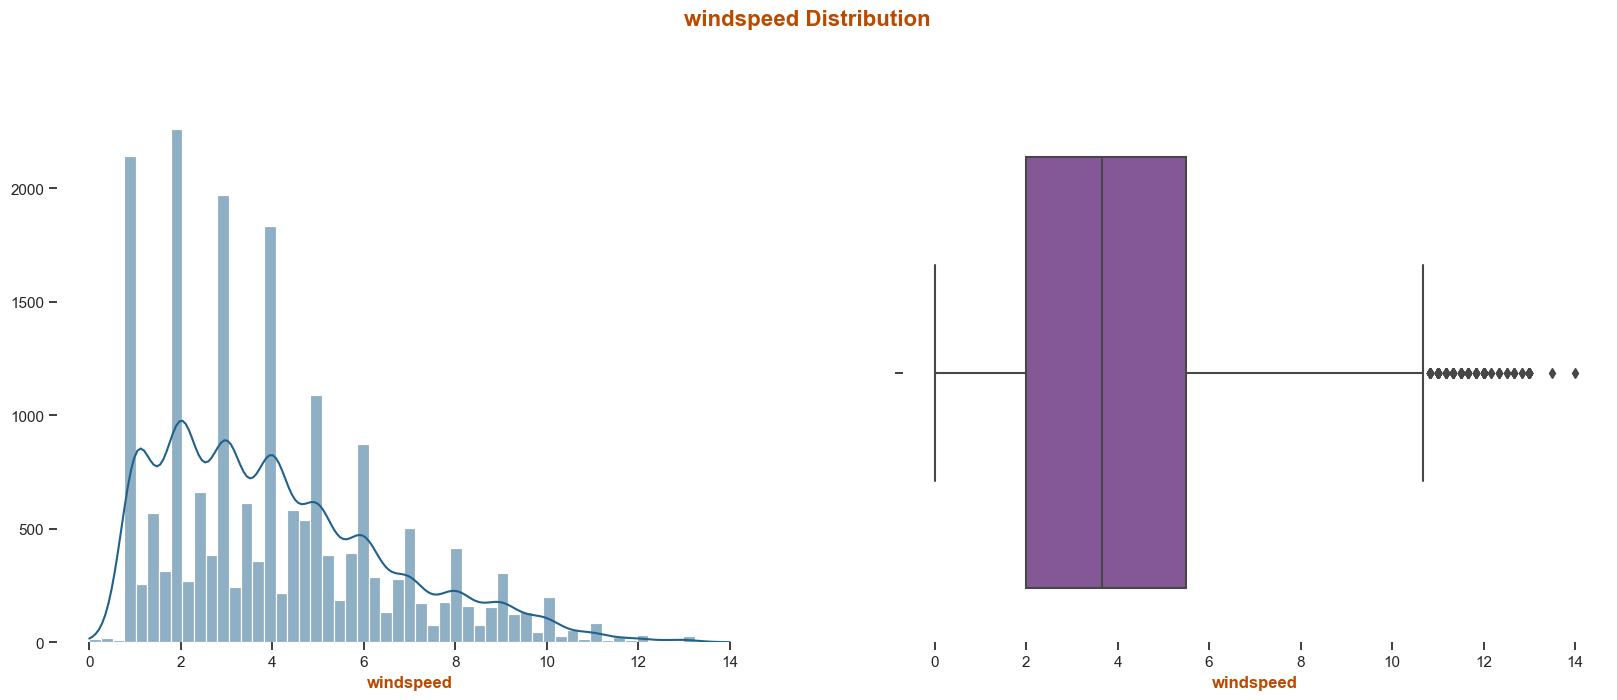

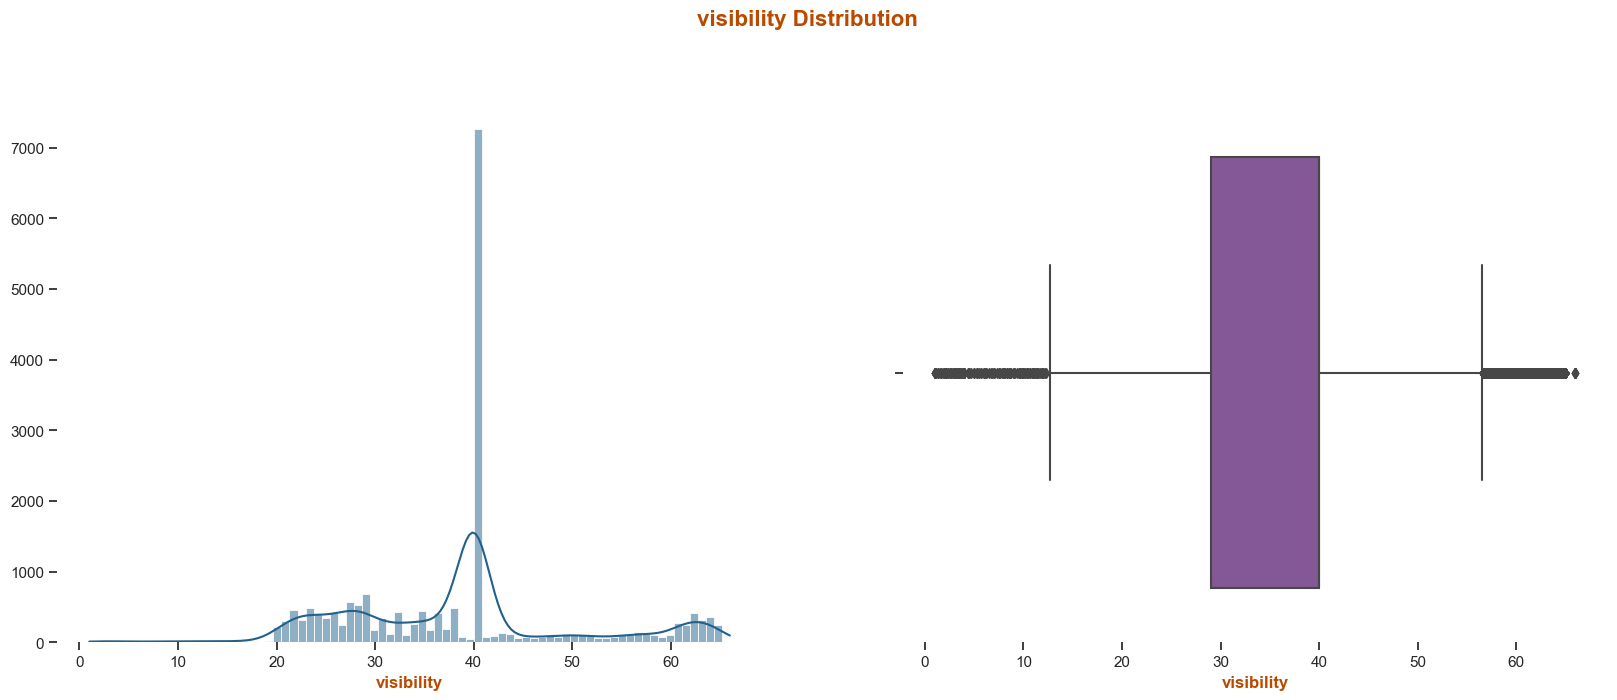

In [16]:
for i in weather_params:
    univariate_numerical_plot(energy_df, x=i, xlabel= i)

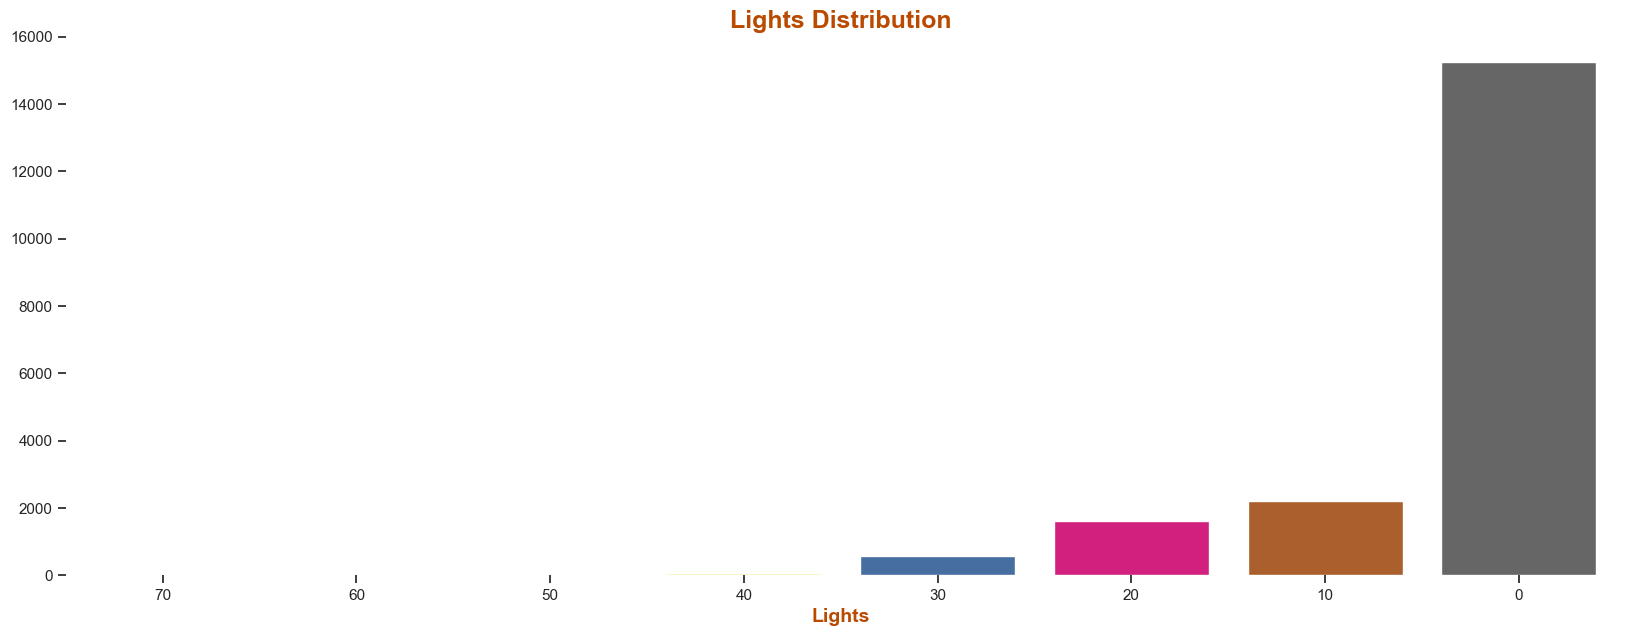

In [17]:
# light_params = ["lights"]

# random_params = ["rv1", "rv2"]

# target = ["appliances"]

for i in light_params:
    univariate_single_plot(energy_df, x=i, xlabel="Lights")

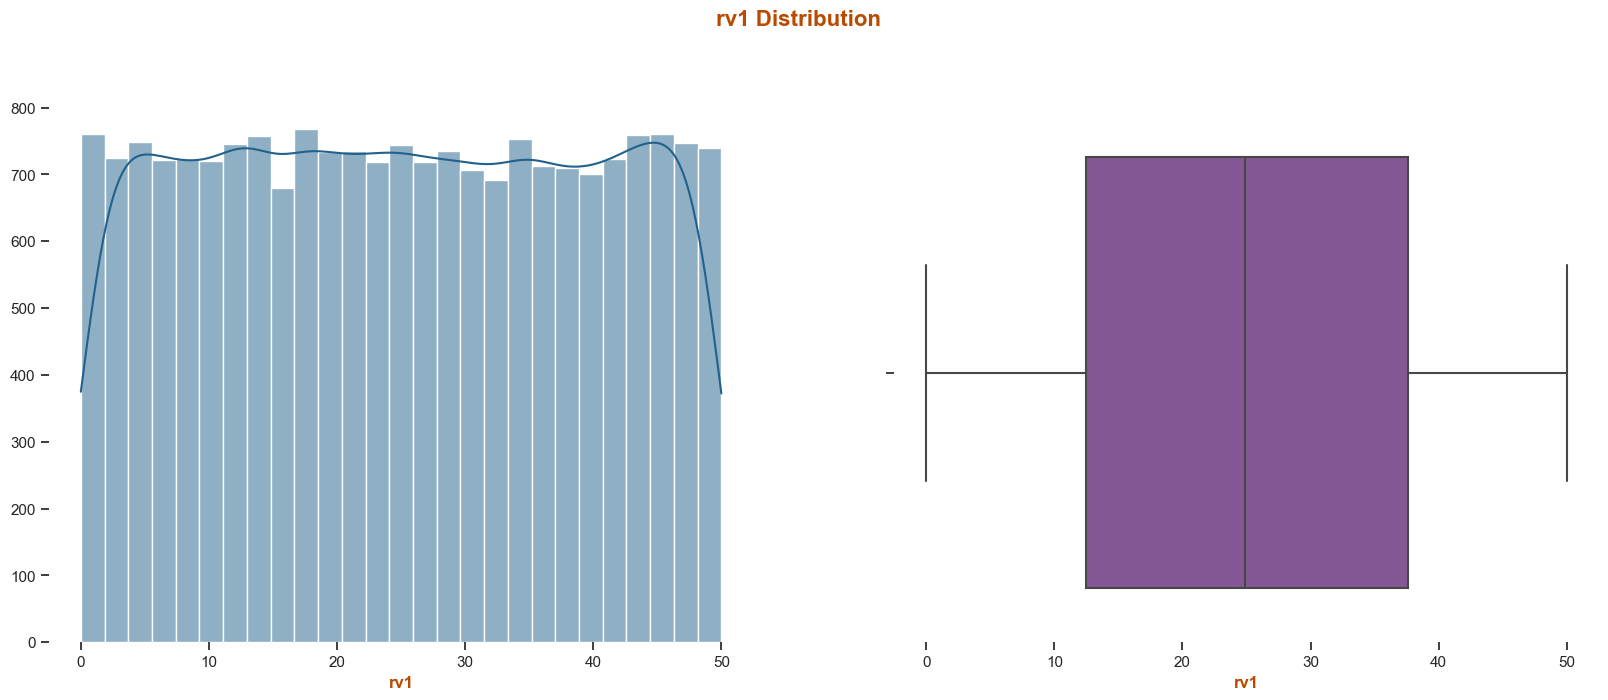

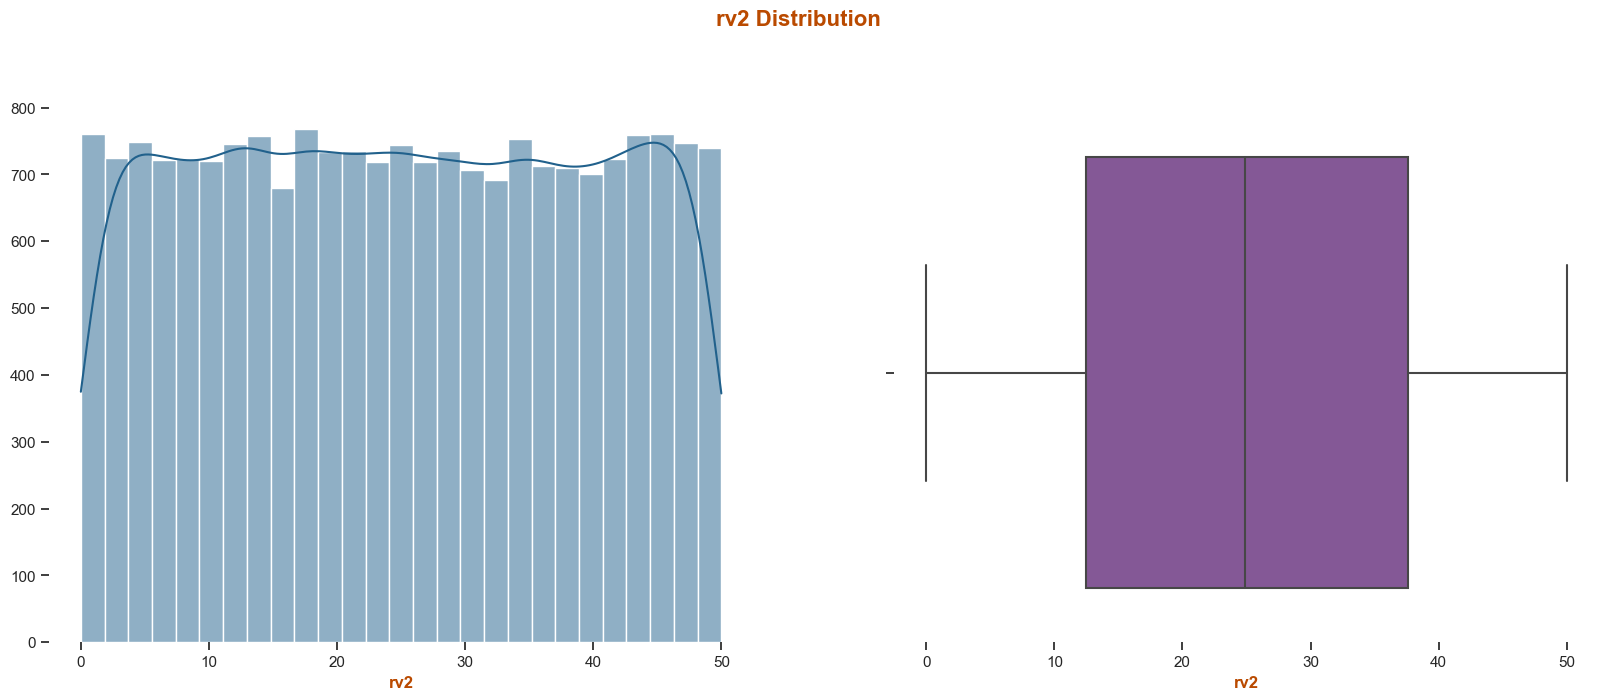

In [18]:
for i in random_params:
    univariate_numerical_plot(energy_df, x=i, xlabel=i)

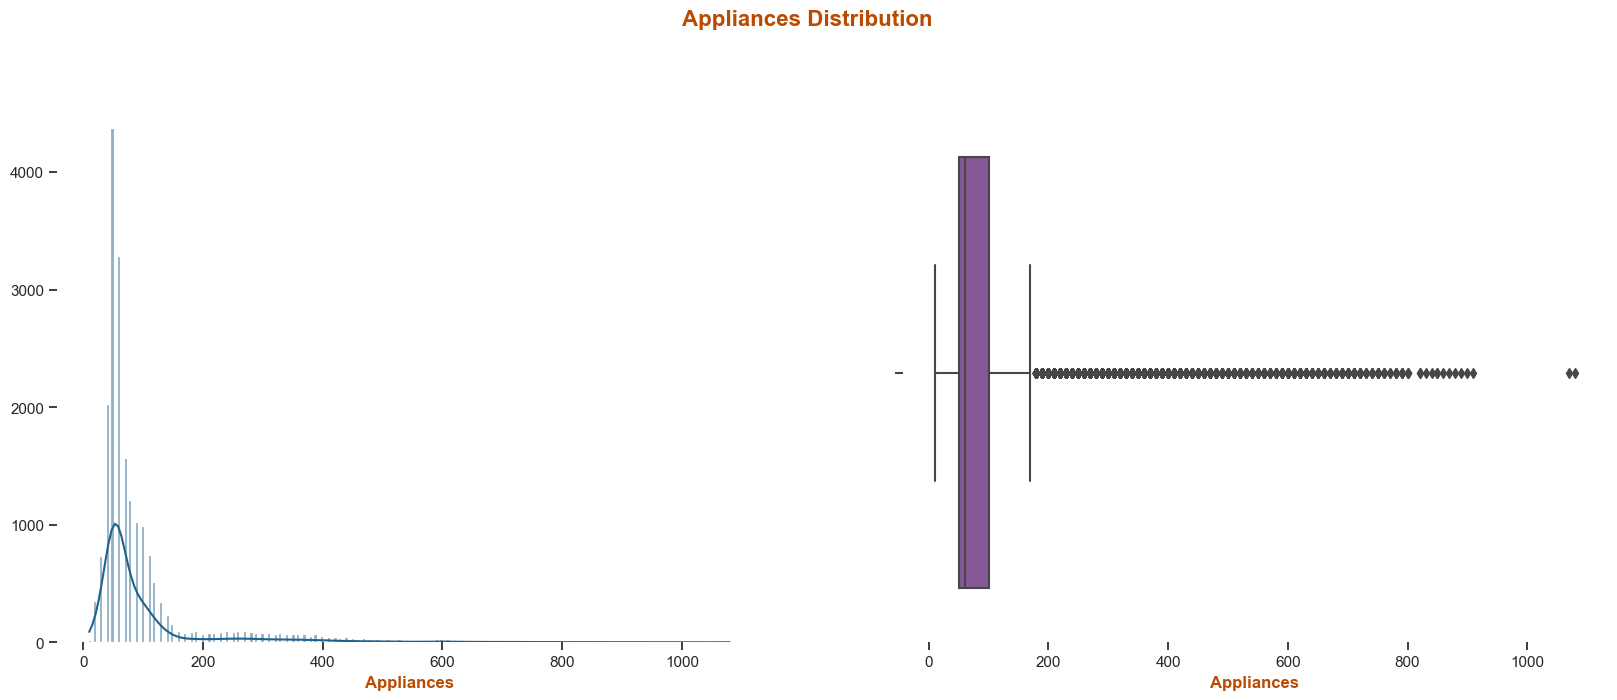

In [19]:
for i in target:
    univariate_numerical_plot(energy_df, x=i, xlabel="Appliances")

/var/folders/wg/jtm_b31d60jgtpd71c8mfj2h0000gn/T/ipykernel_32129/3733142630.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  energy_df.hist(bins=100, ax=ax, layout=(3, 3), column=temp_params)


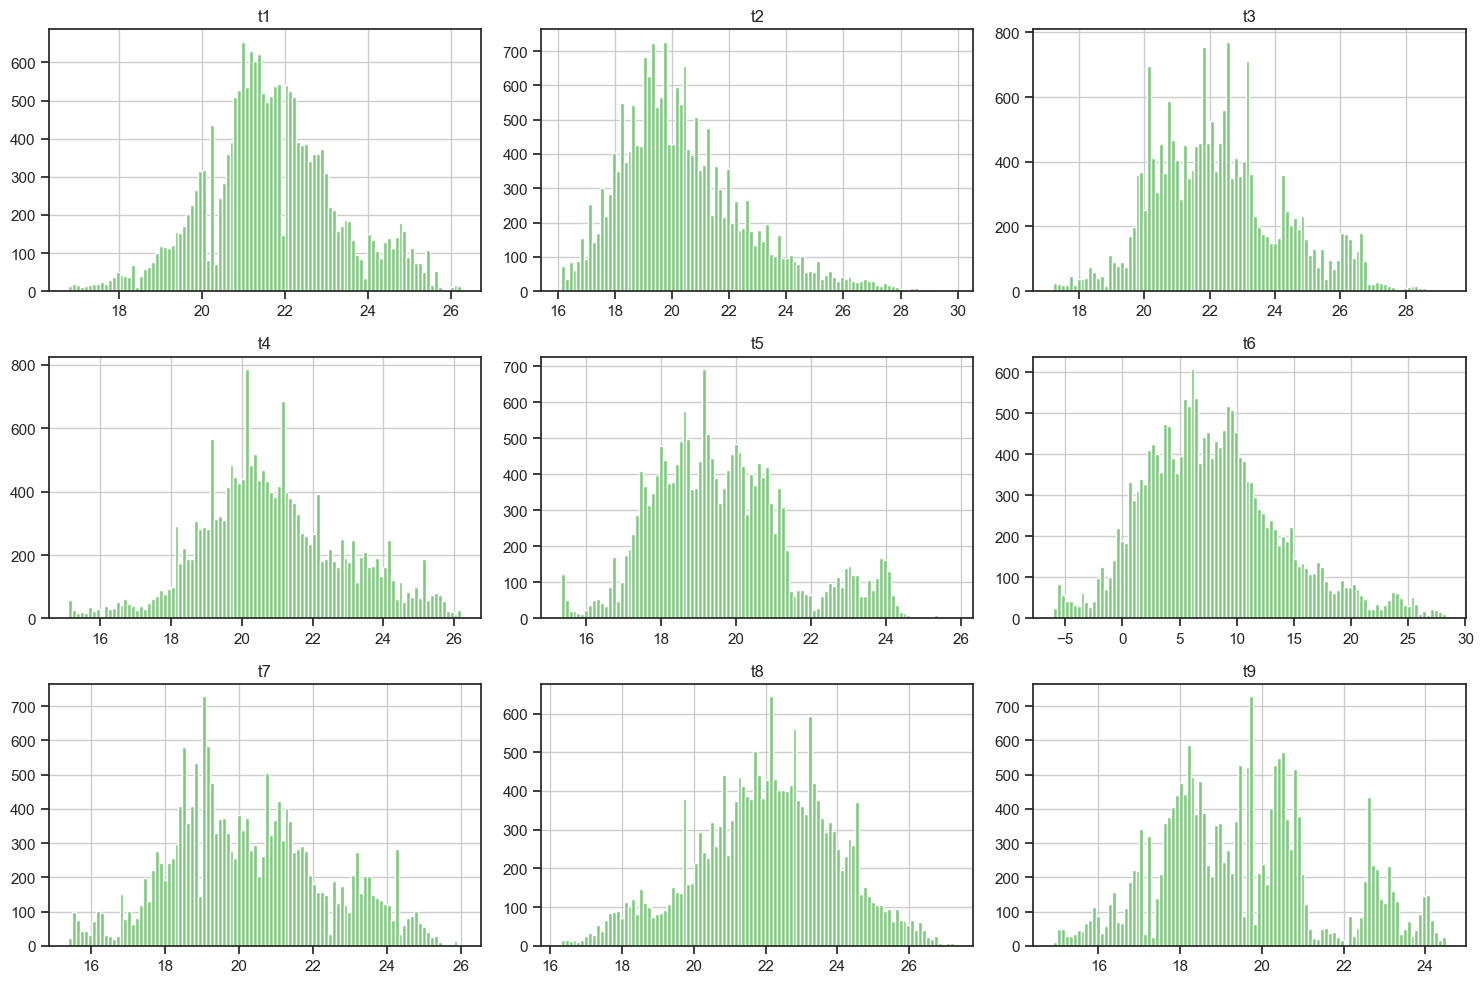

In [20]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
energy_df.hist(bins=100, ax=ax, layout=(3, 3), column=temp_params)
plt.tight_layout()
plt.show()

/var/folders/wg/jtm_b31d60jgtpd71c8mfj2h0000gn/T/ipykernel_32129/2445419059.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  energy_df.hist(bins=100, ax=ax, layout=(3, 3), column=hum_params)


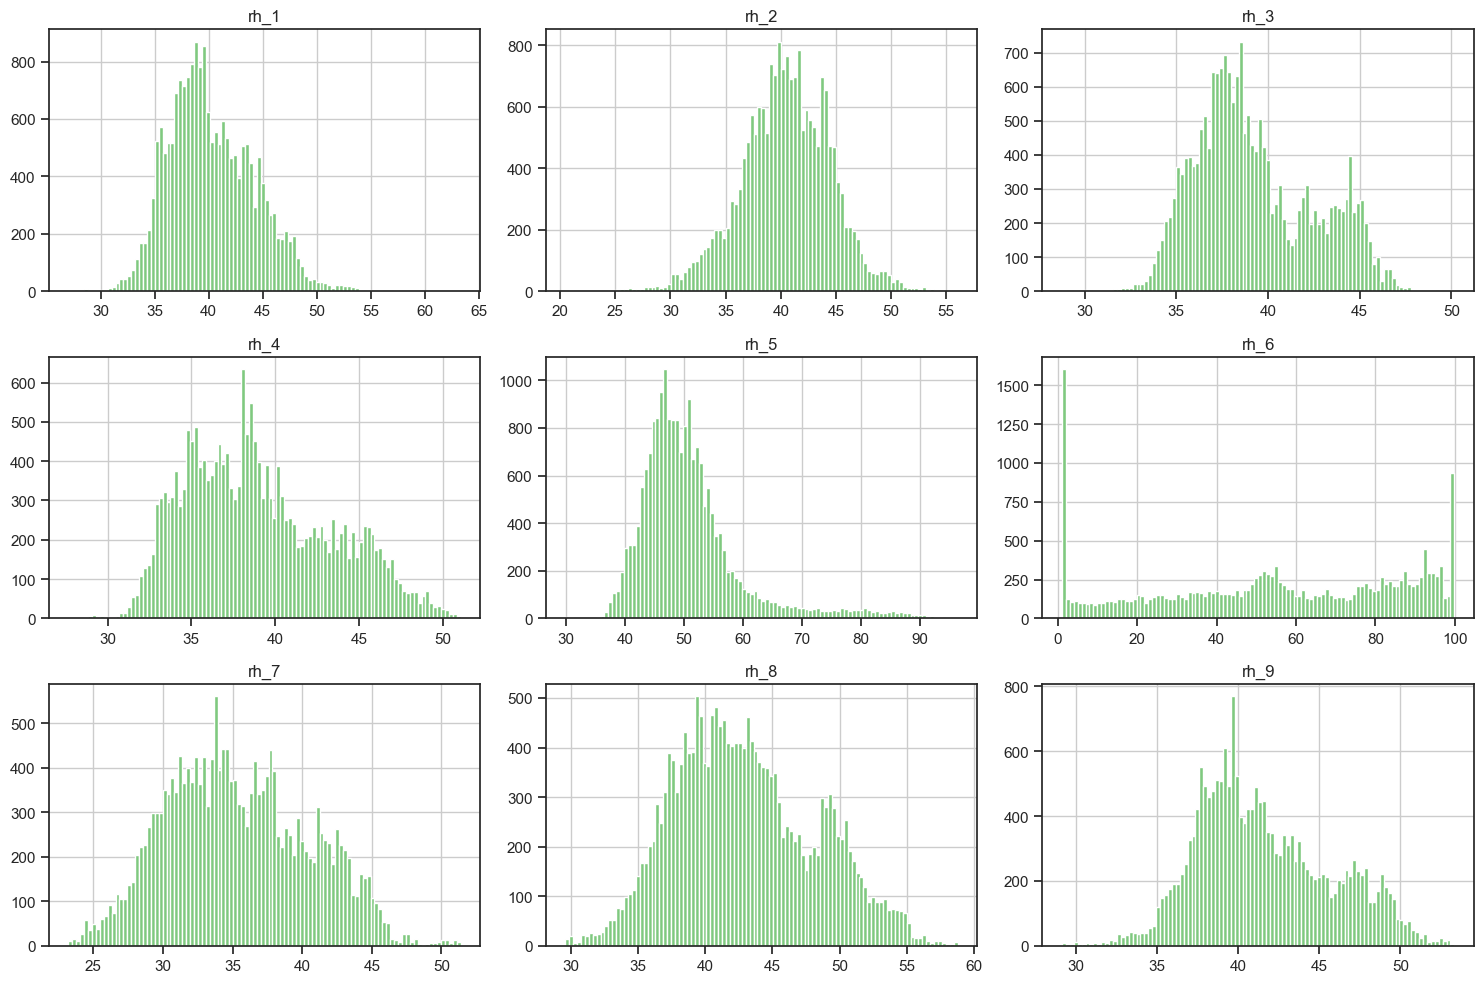

In [21]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
energy_df.hist(bins=100, ax=ax, layout=(3, 3), column=hum_params)
plt.tight_layout()
plt.show()

/var/folders/wg/jtm_b31d60jgtpd71c8mfj2h0000gn/T/ipykernel_32129/116911268.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  energy_df.hist(bins=100, ax=ax, layout=(2, 3), column=weather_params)


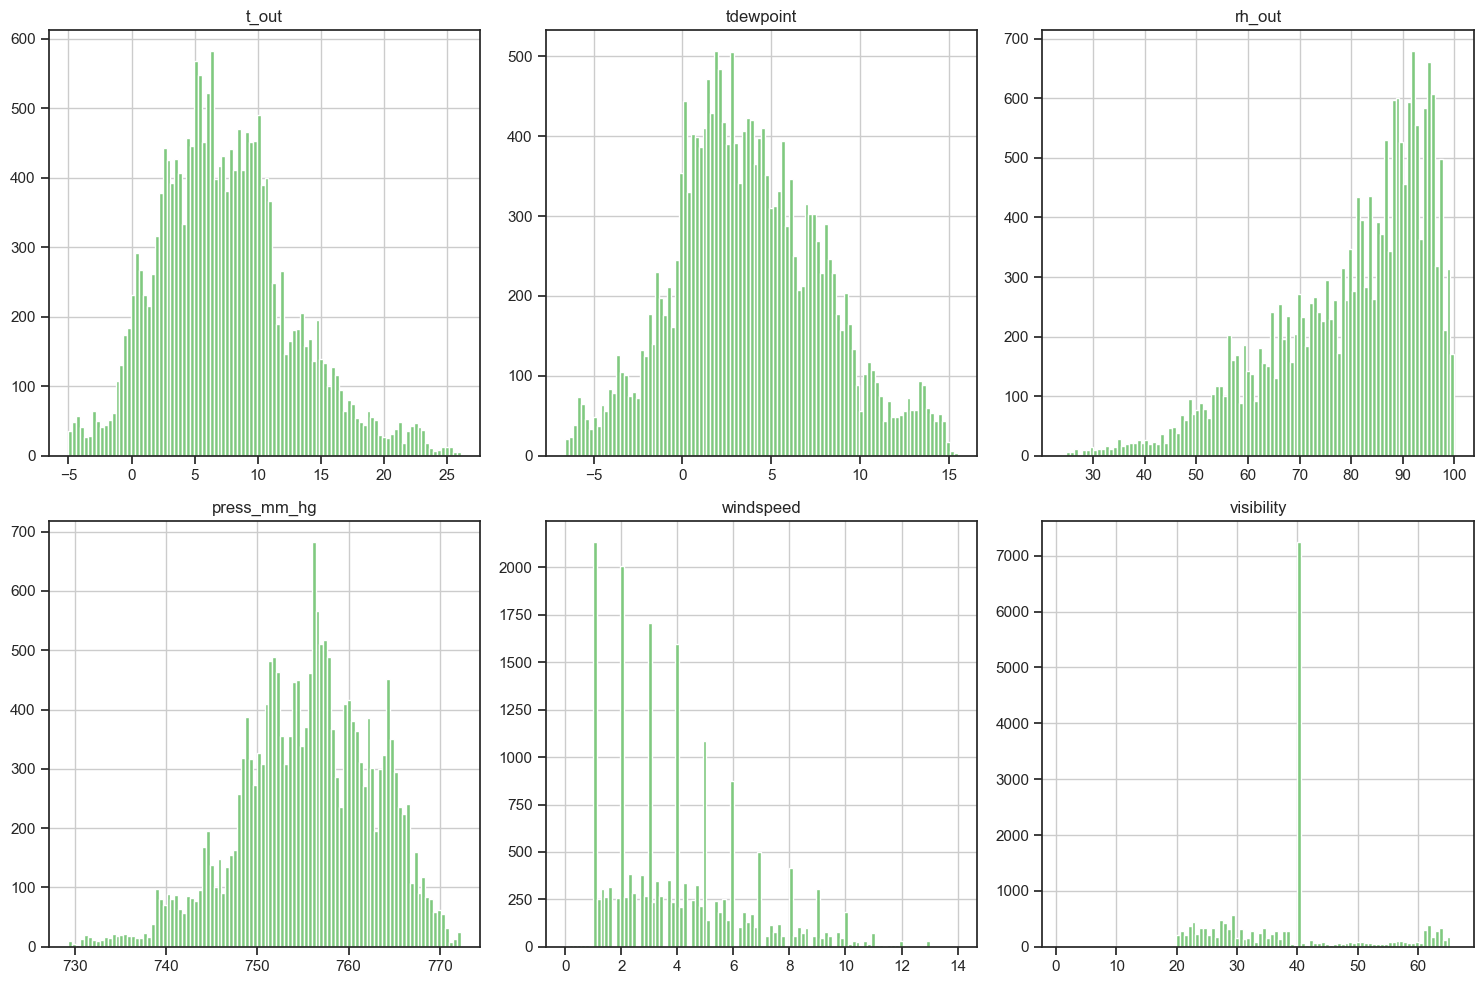

In [22]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
energy_df.hist(bins=100, ax=ax, layout=(2, 3), column=weather_params)
plt.tight_layout()
plt.show()

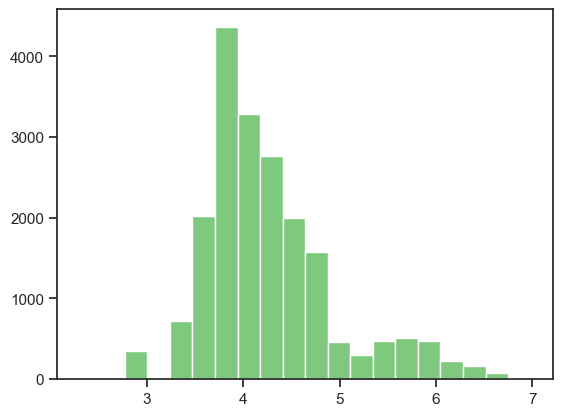

In [23]:
plt.hist(np.log(energy_df.appliances), bins=20)
plt.show()

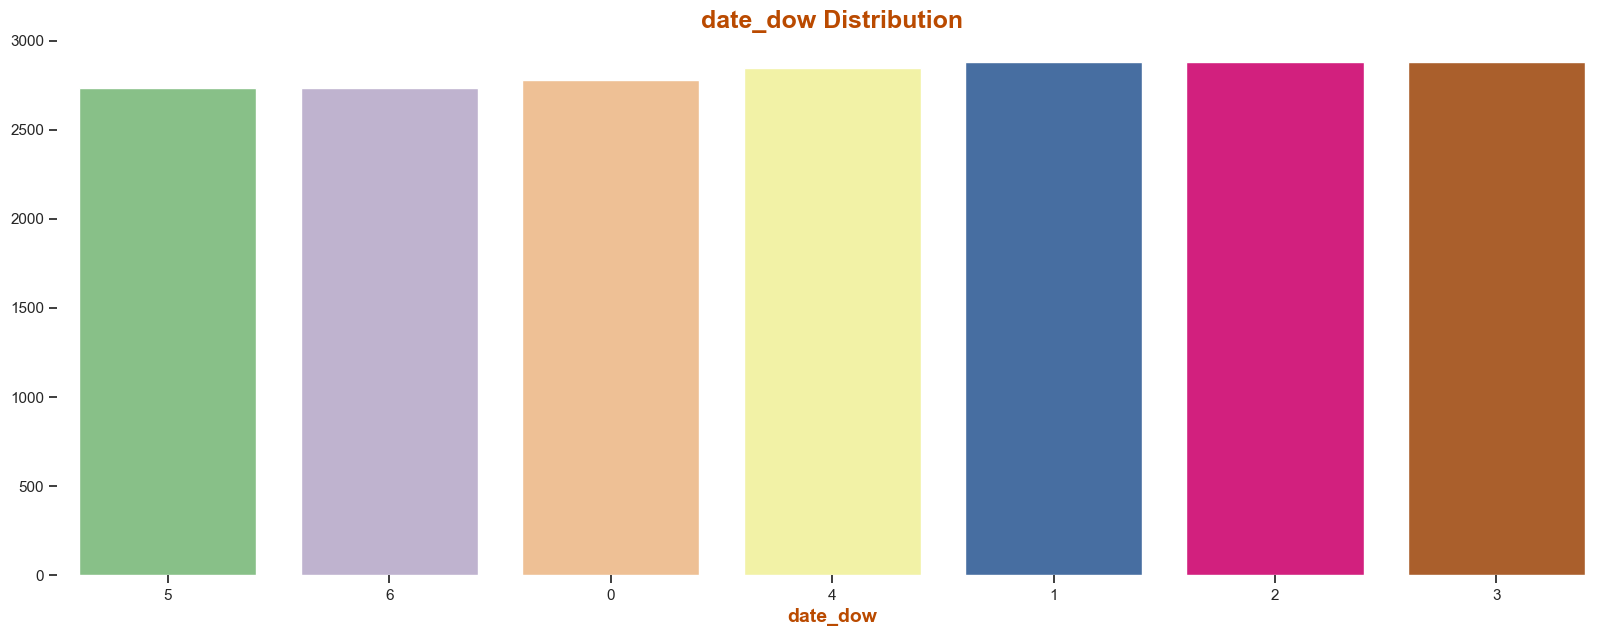

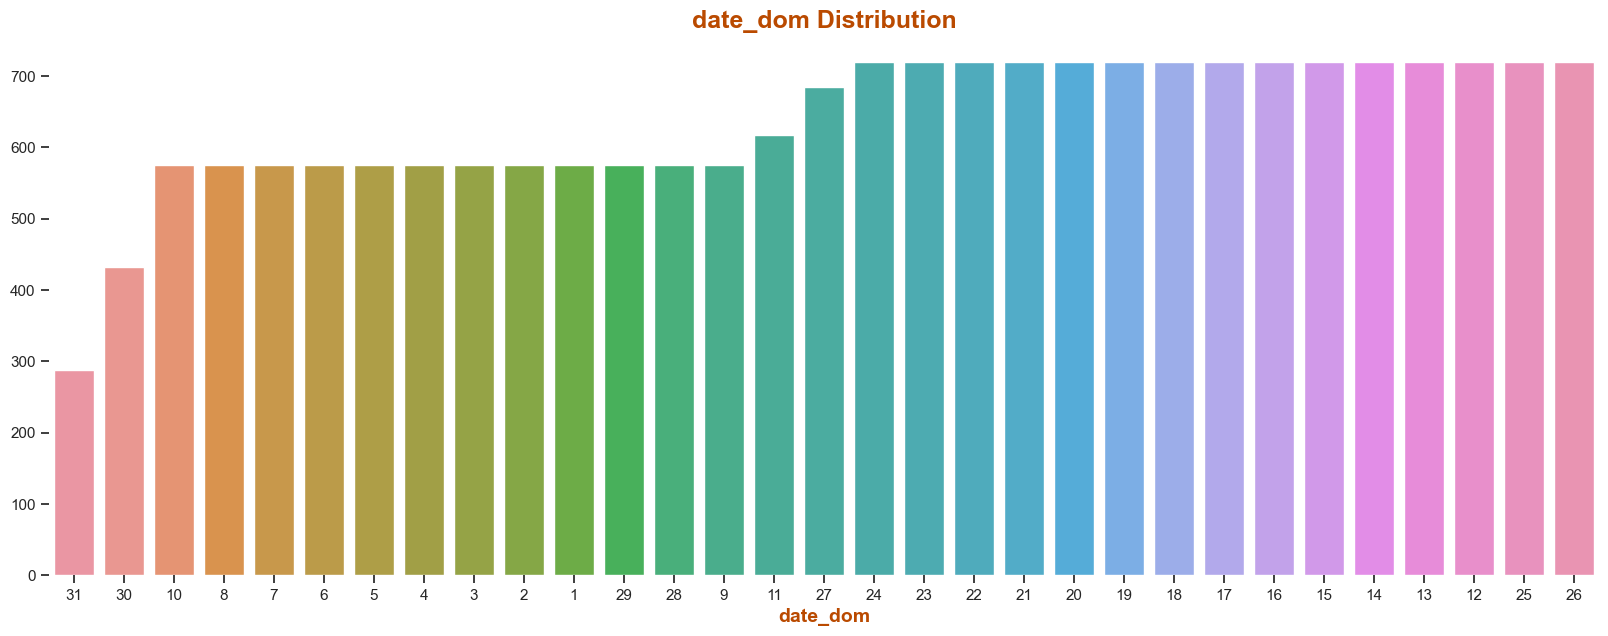

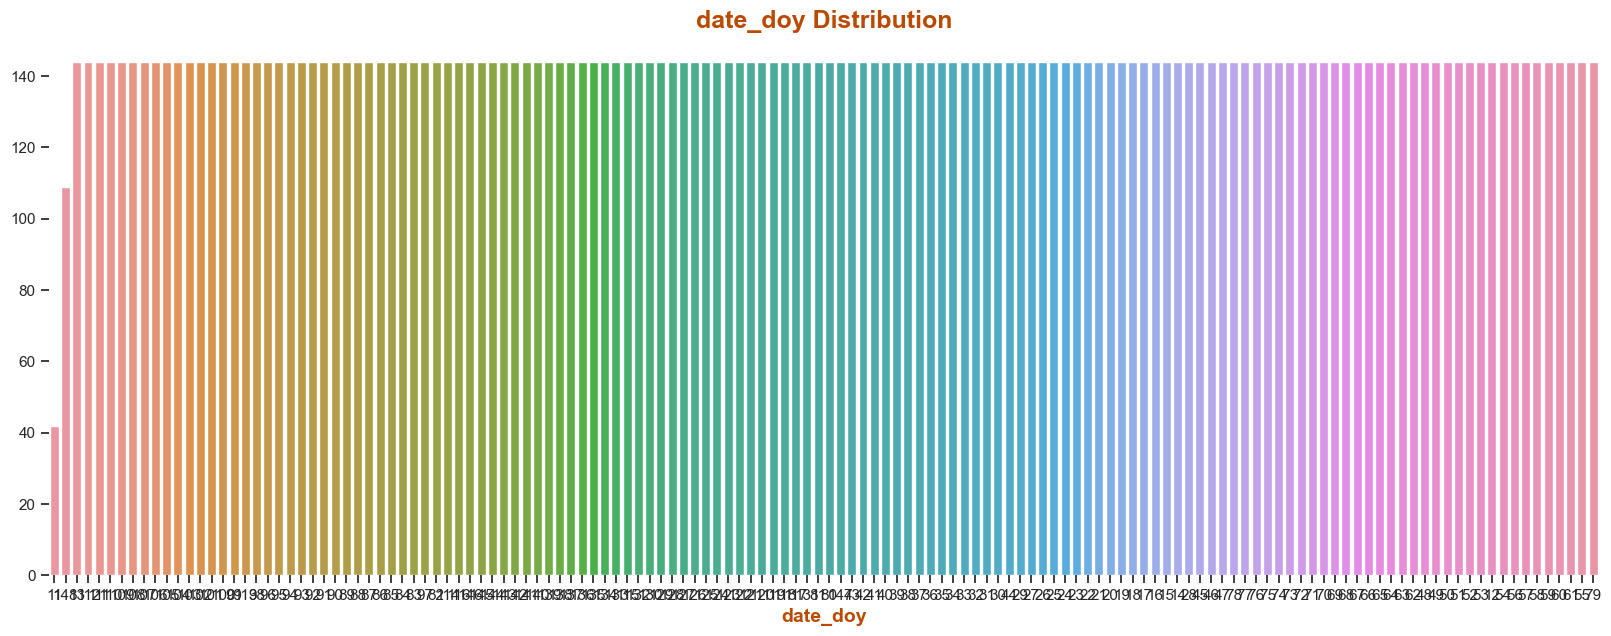

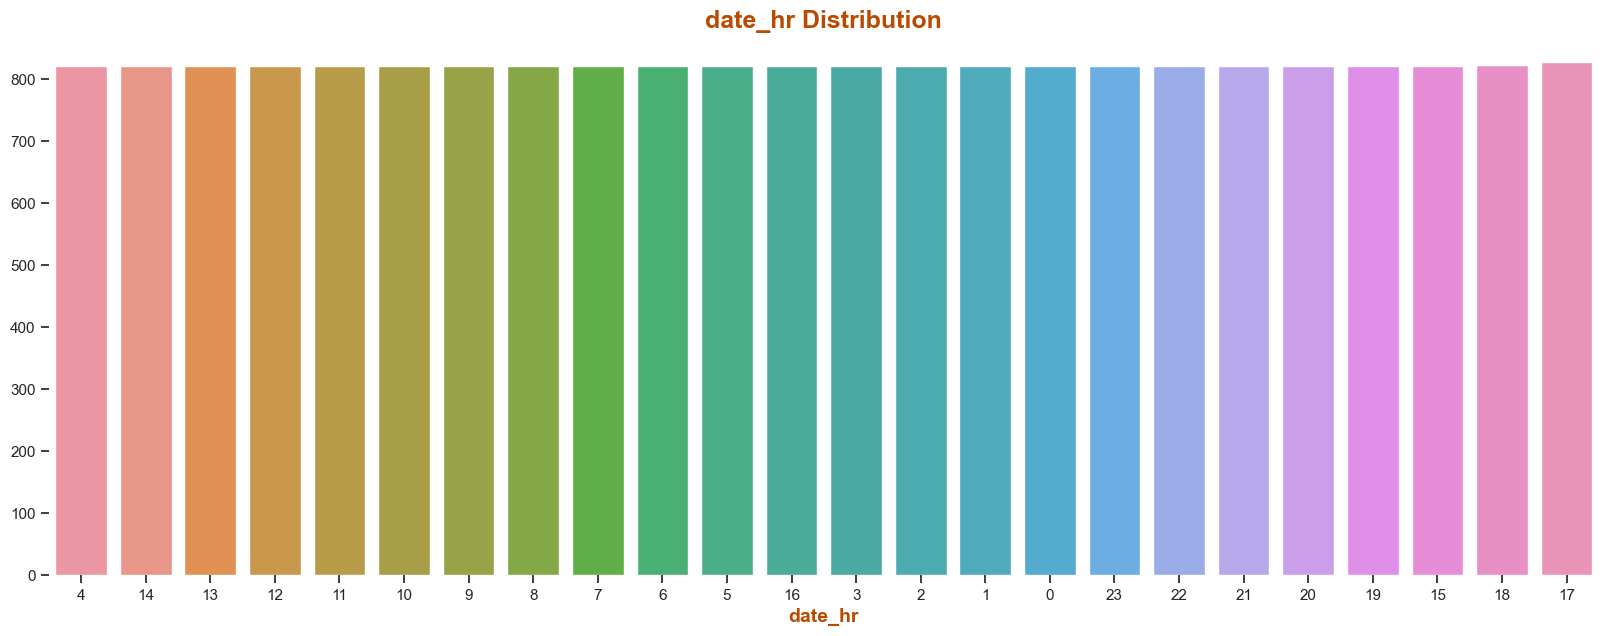

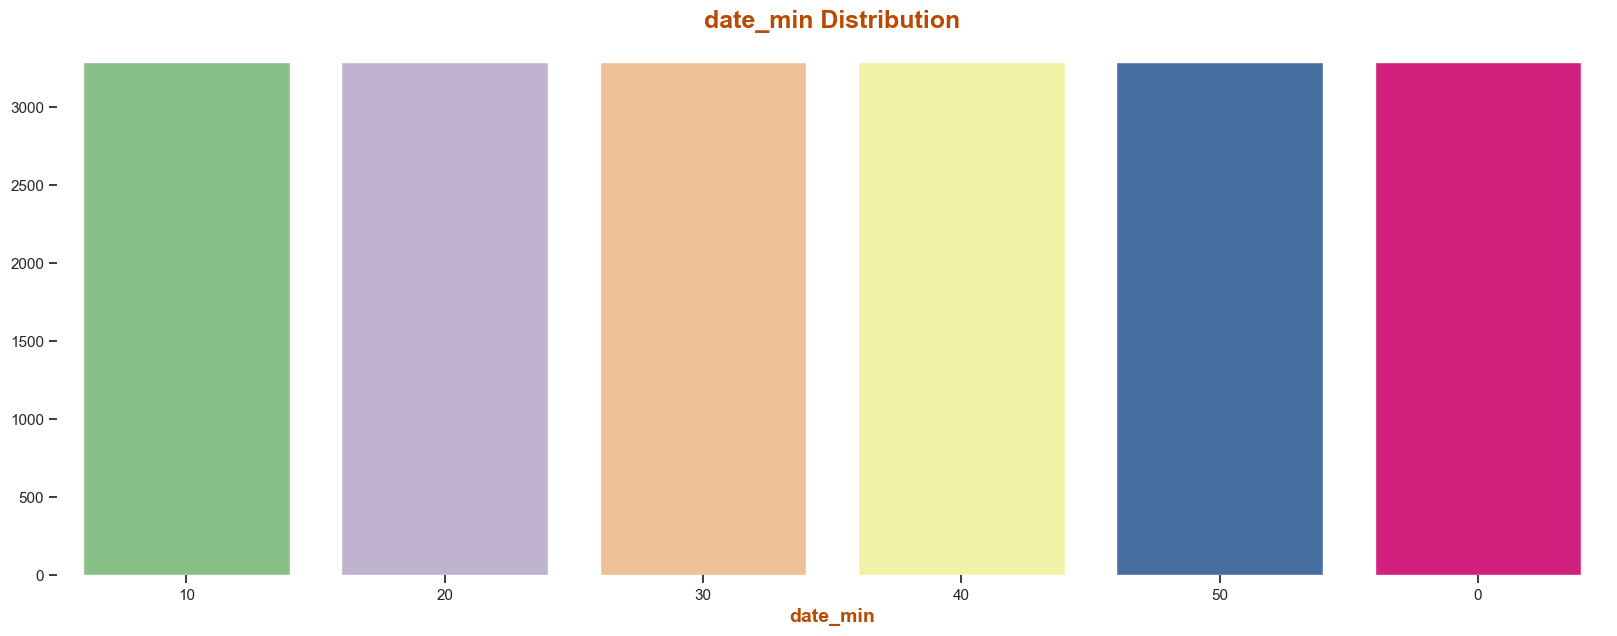

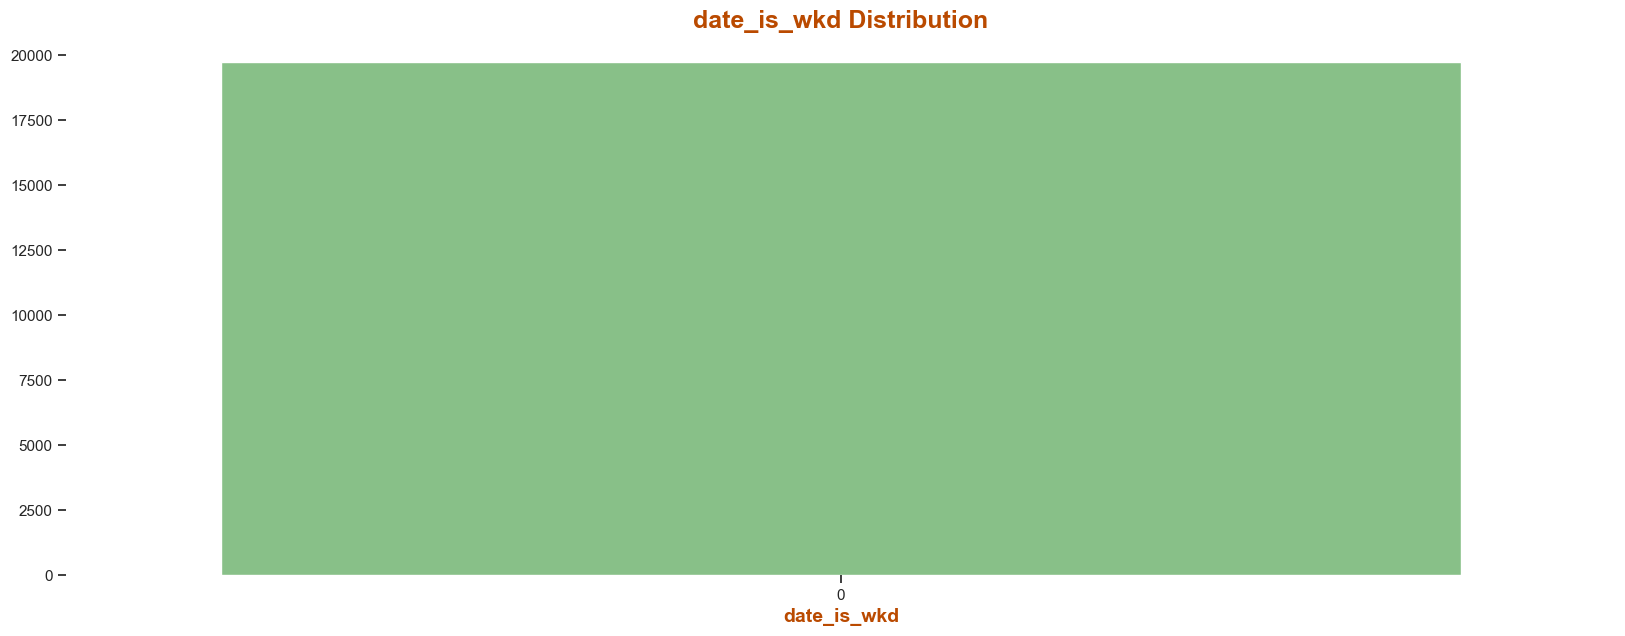

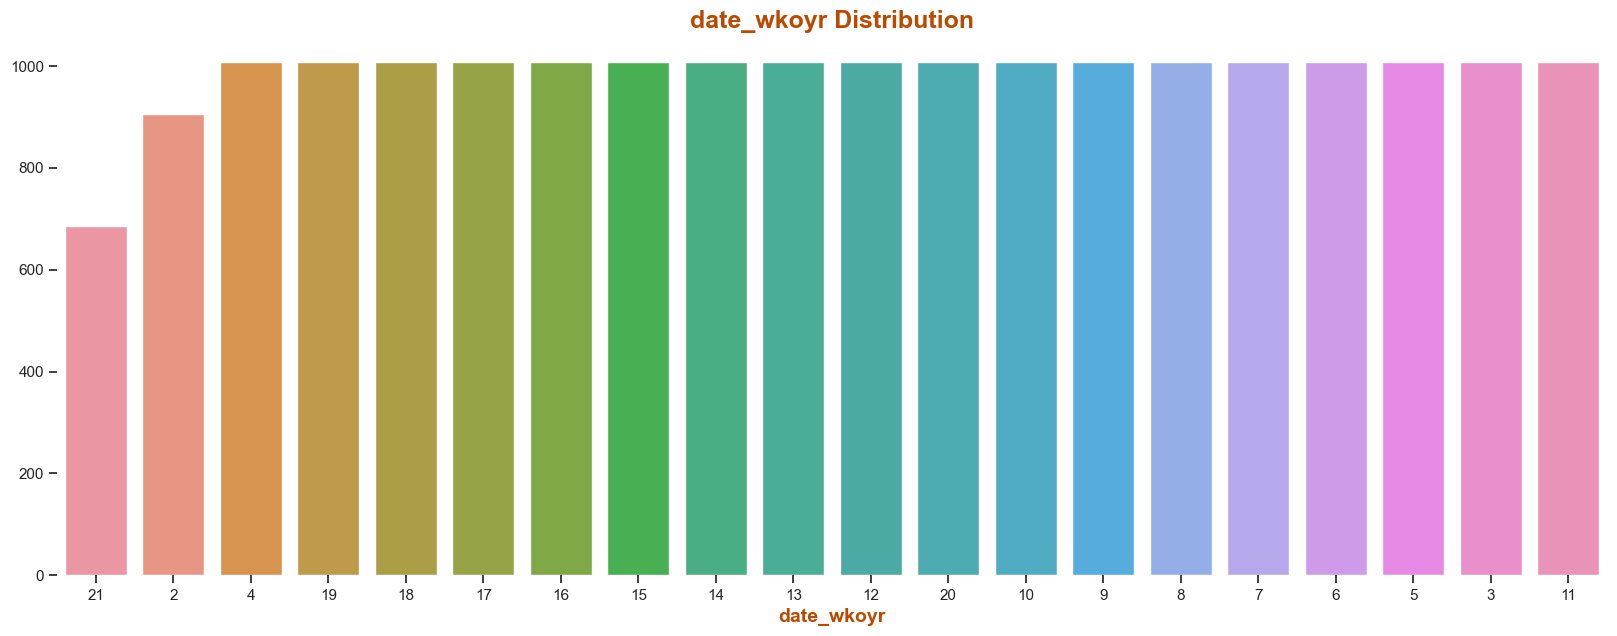

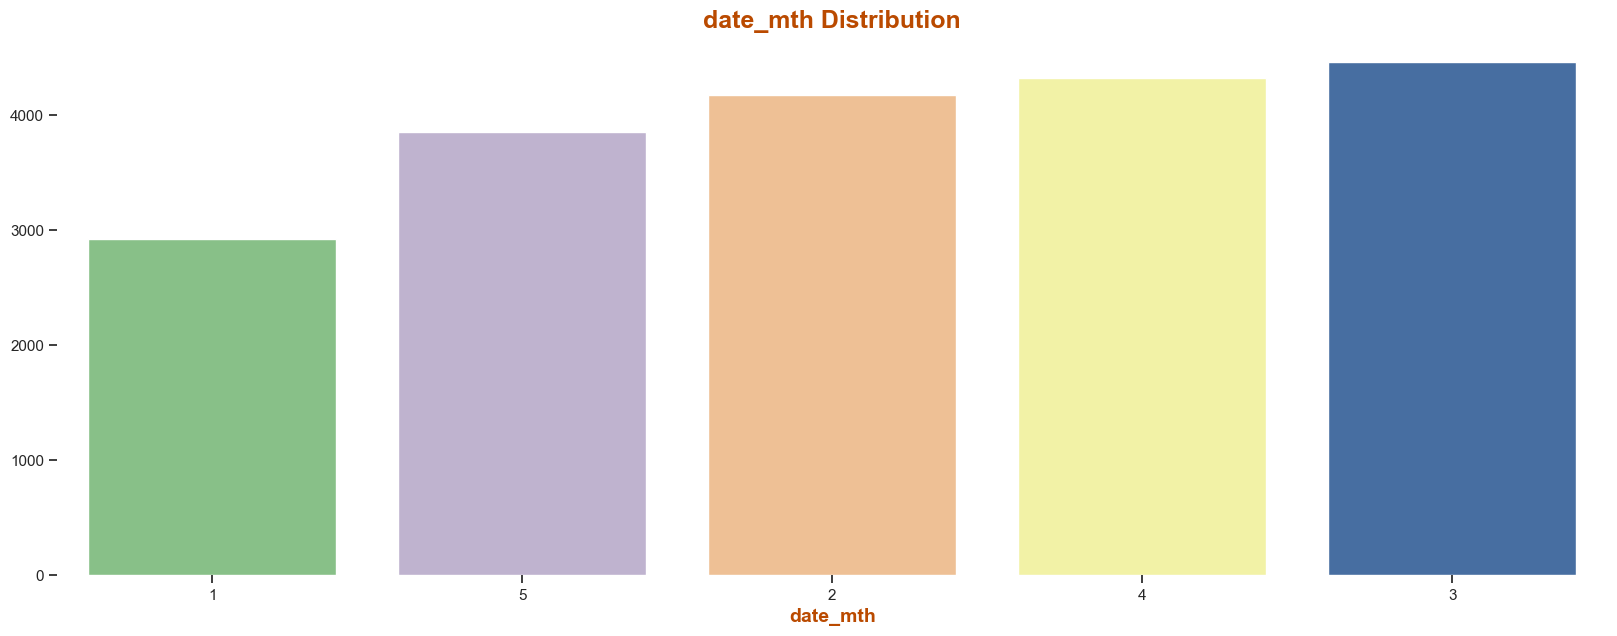

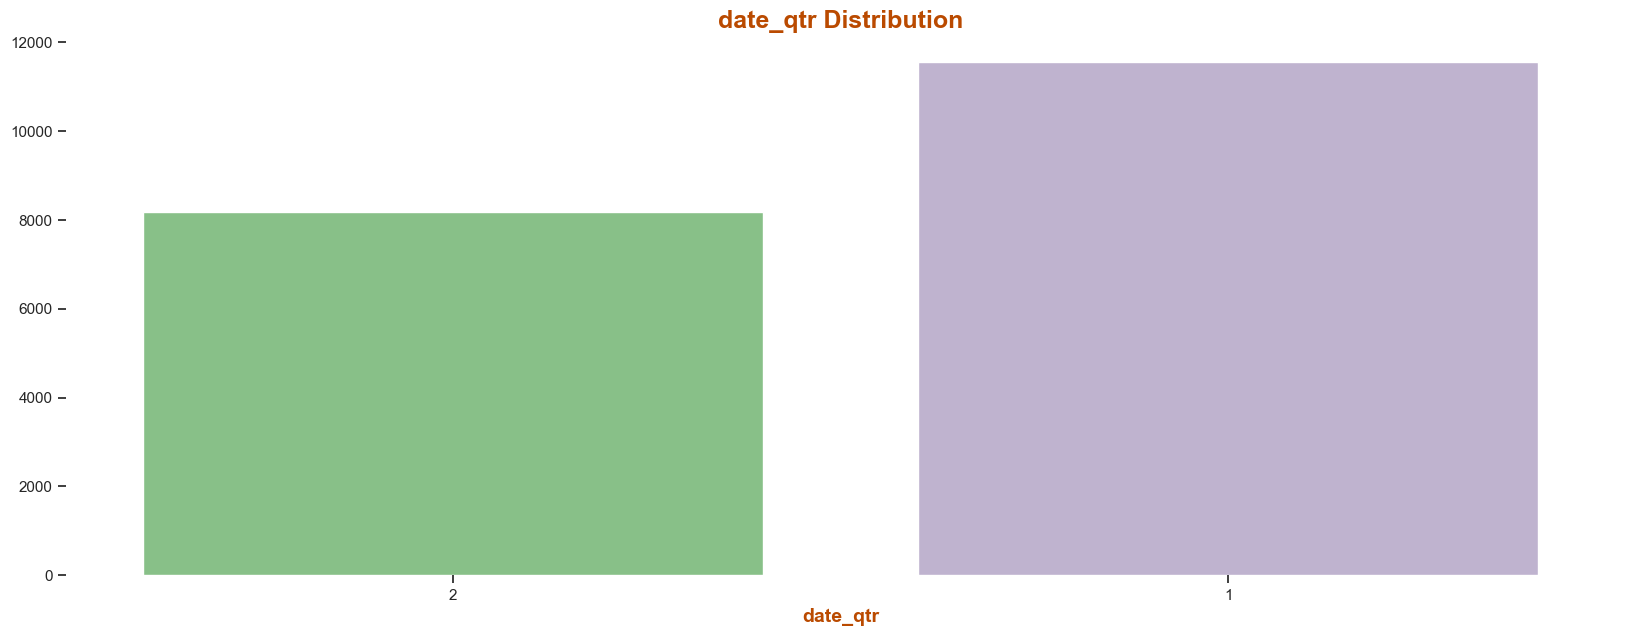

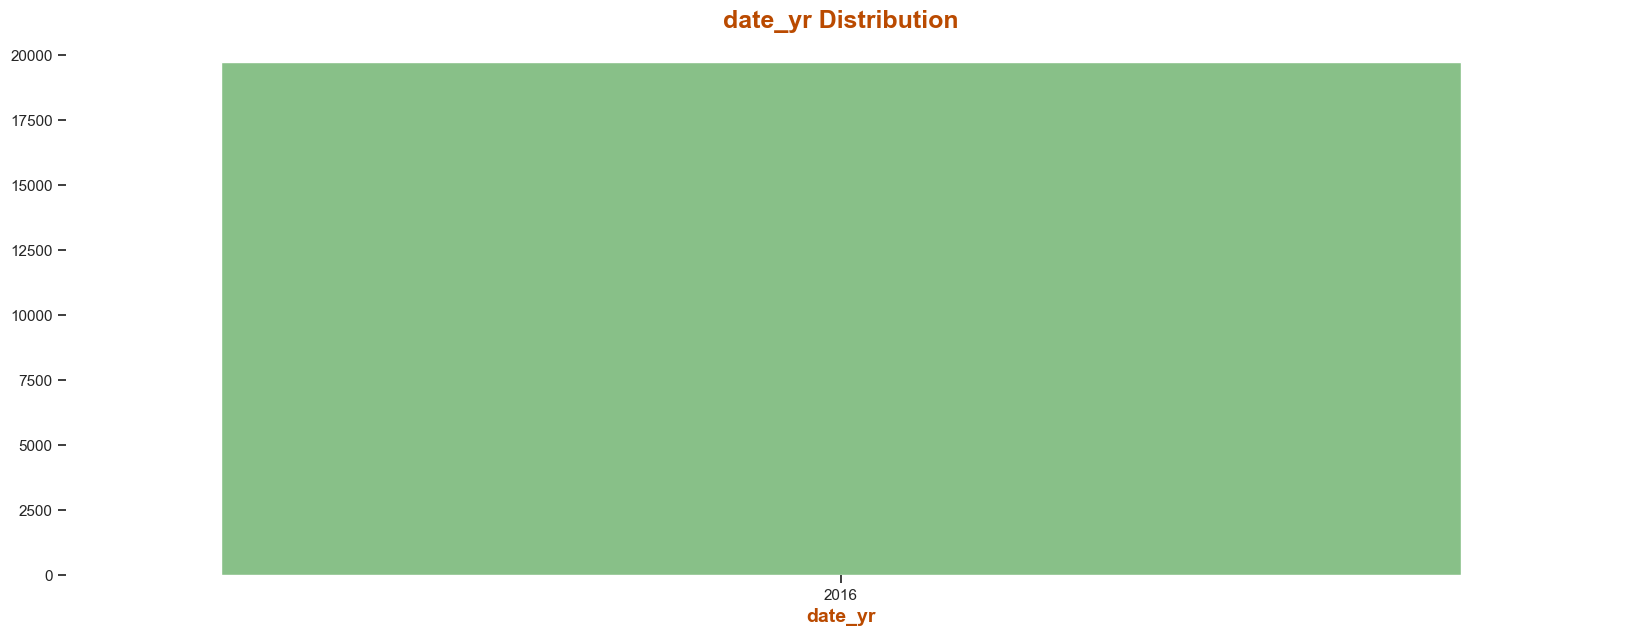

In [24]:
for i in energy_df.columns[-10:].to_list():
    univariate_single_plot(x=i, xlabel=i)

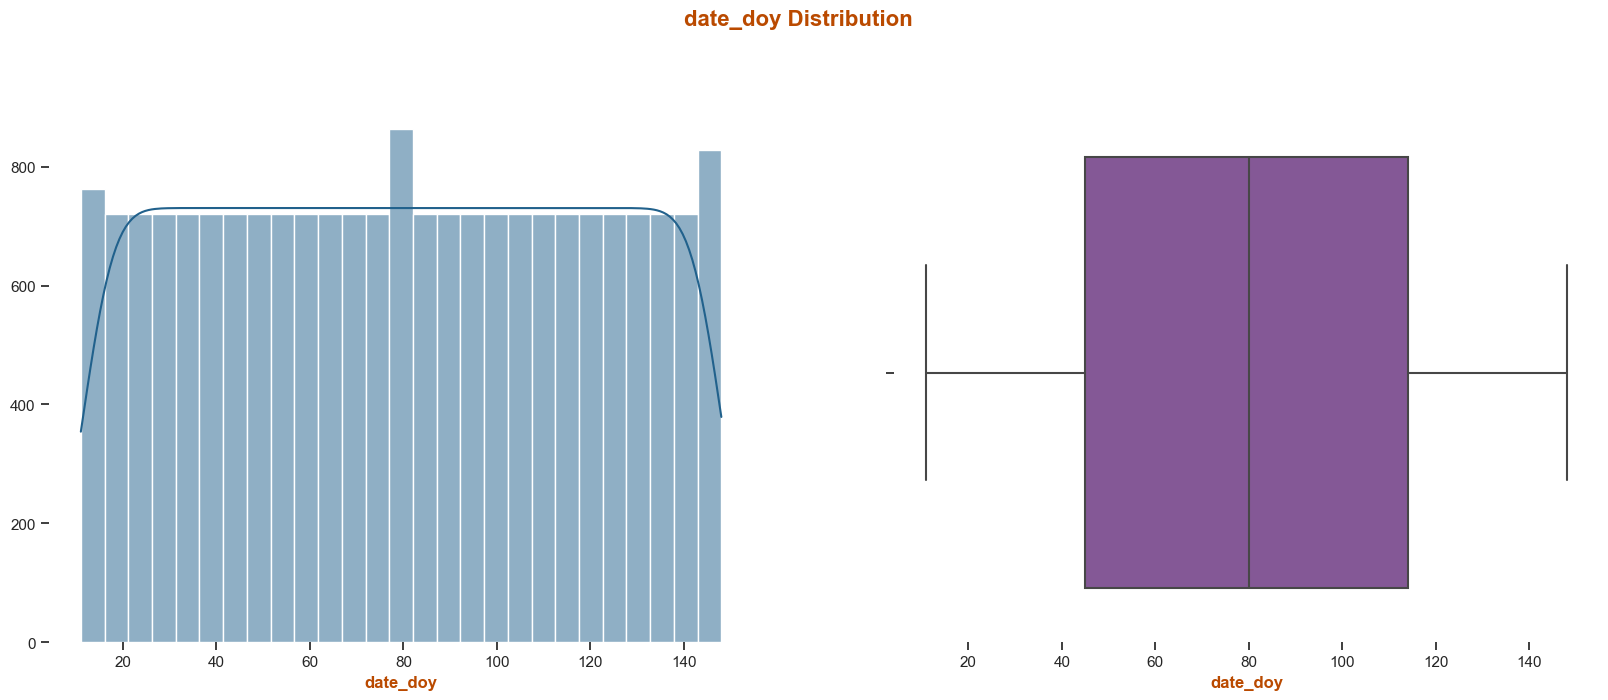

In [25]:
for i in ['date_doy',]:
    univariate_numerical_plot(energy_df, x=i, xlabel=i)

`date_is_wkd` and `date_yr` paramters all have single values. `date_doy` appears to be continuous than categorical.

<div id='exploratory-data-analysis'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">6. Feature importance
    </h2>
</div>

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">6.1 Feature Importance: Mutual Info score
    </h3>
</div> 

In [29]:
date_params = ['date_dow',
 'date_dom',
 'date_doy',
 'date_hr',
 'date_min',
 'date_wkoyr',
 'date_mth',
 'date_qtr',]

def mutual_info_appliance_score(series):
    return mutual_info_score(series, energy_df['appliances'])

mi = energy_df[date_params + light_params].apply(mutual_info_appliance_score)
mi.sort_values(ascending=False)

date_doy      0.361788
date_hr       0.322906
date_wkoyr    0.112447
date_dom      0.091083
lights        0.064255
date_mth      0.057137
date_dow      0.032088
date_qtr      0.028489
date_min      0.011242
dtype: float64

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">6.2 Feature Importance: Correlation
    </h3>
</div> 

In [30]:
energy_df[temp_params].corrwith(energy_df.appliances).abs()

t1    0.055447
t2    0.120073
t3    0.085060
t4    0.040281
t5    0.019760
t6    0.117638
t7    0.025801
t8    0.039572
t9    0.010010
dtype: float64

In [28]:
energy_df[hum_params].corrwith(energy_df.appliances).abs()

rh_1    0.086031
rh_2    0.060465
rh_3    0.036292
rh_4    0.016965
rh_5    0.006955
rh_6    0.083178
rh_7    0.055642
rh_8    0.094039
rh_9    0.051462
dtype: float64

In [31]:
energy_df[weather_params].corrwith(energy_df.appliances).abs()

t_out          0.099155
tdewpoint      0.015353
rh_out         0.152282
press_mm_hg    0.034885
windspeed      0.087122
visibility     0.000230
dtype: float64

In [32]:
energy_df[random_params].corrwith(energy_df.appliances).abs()

rv1    0.011145
rv2    0.011145
dtype: float64

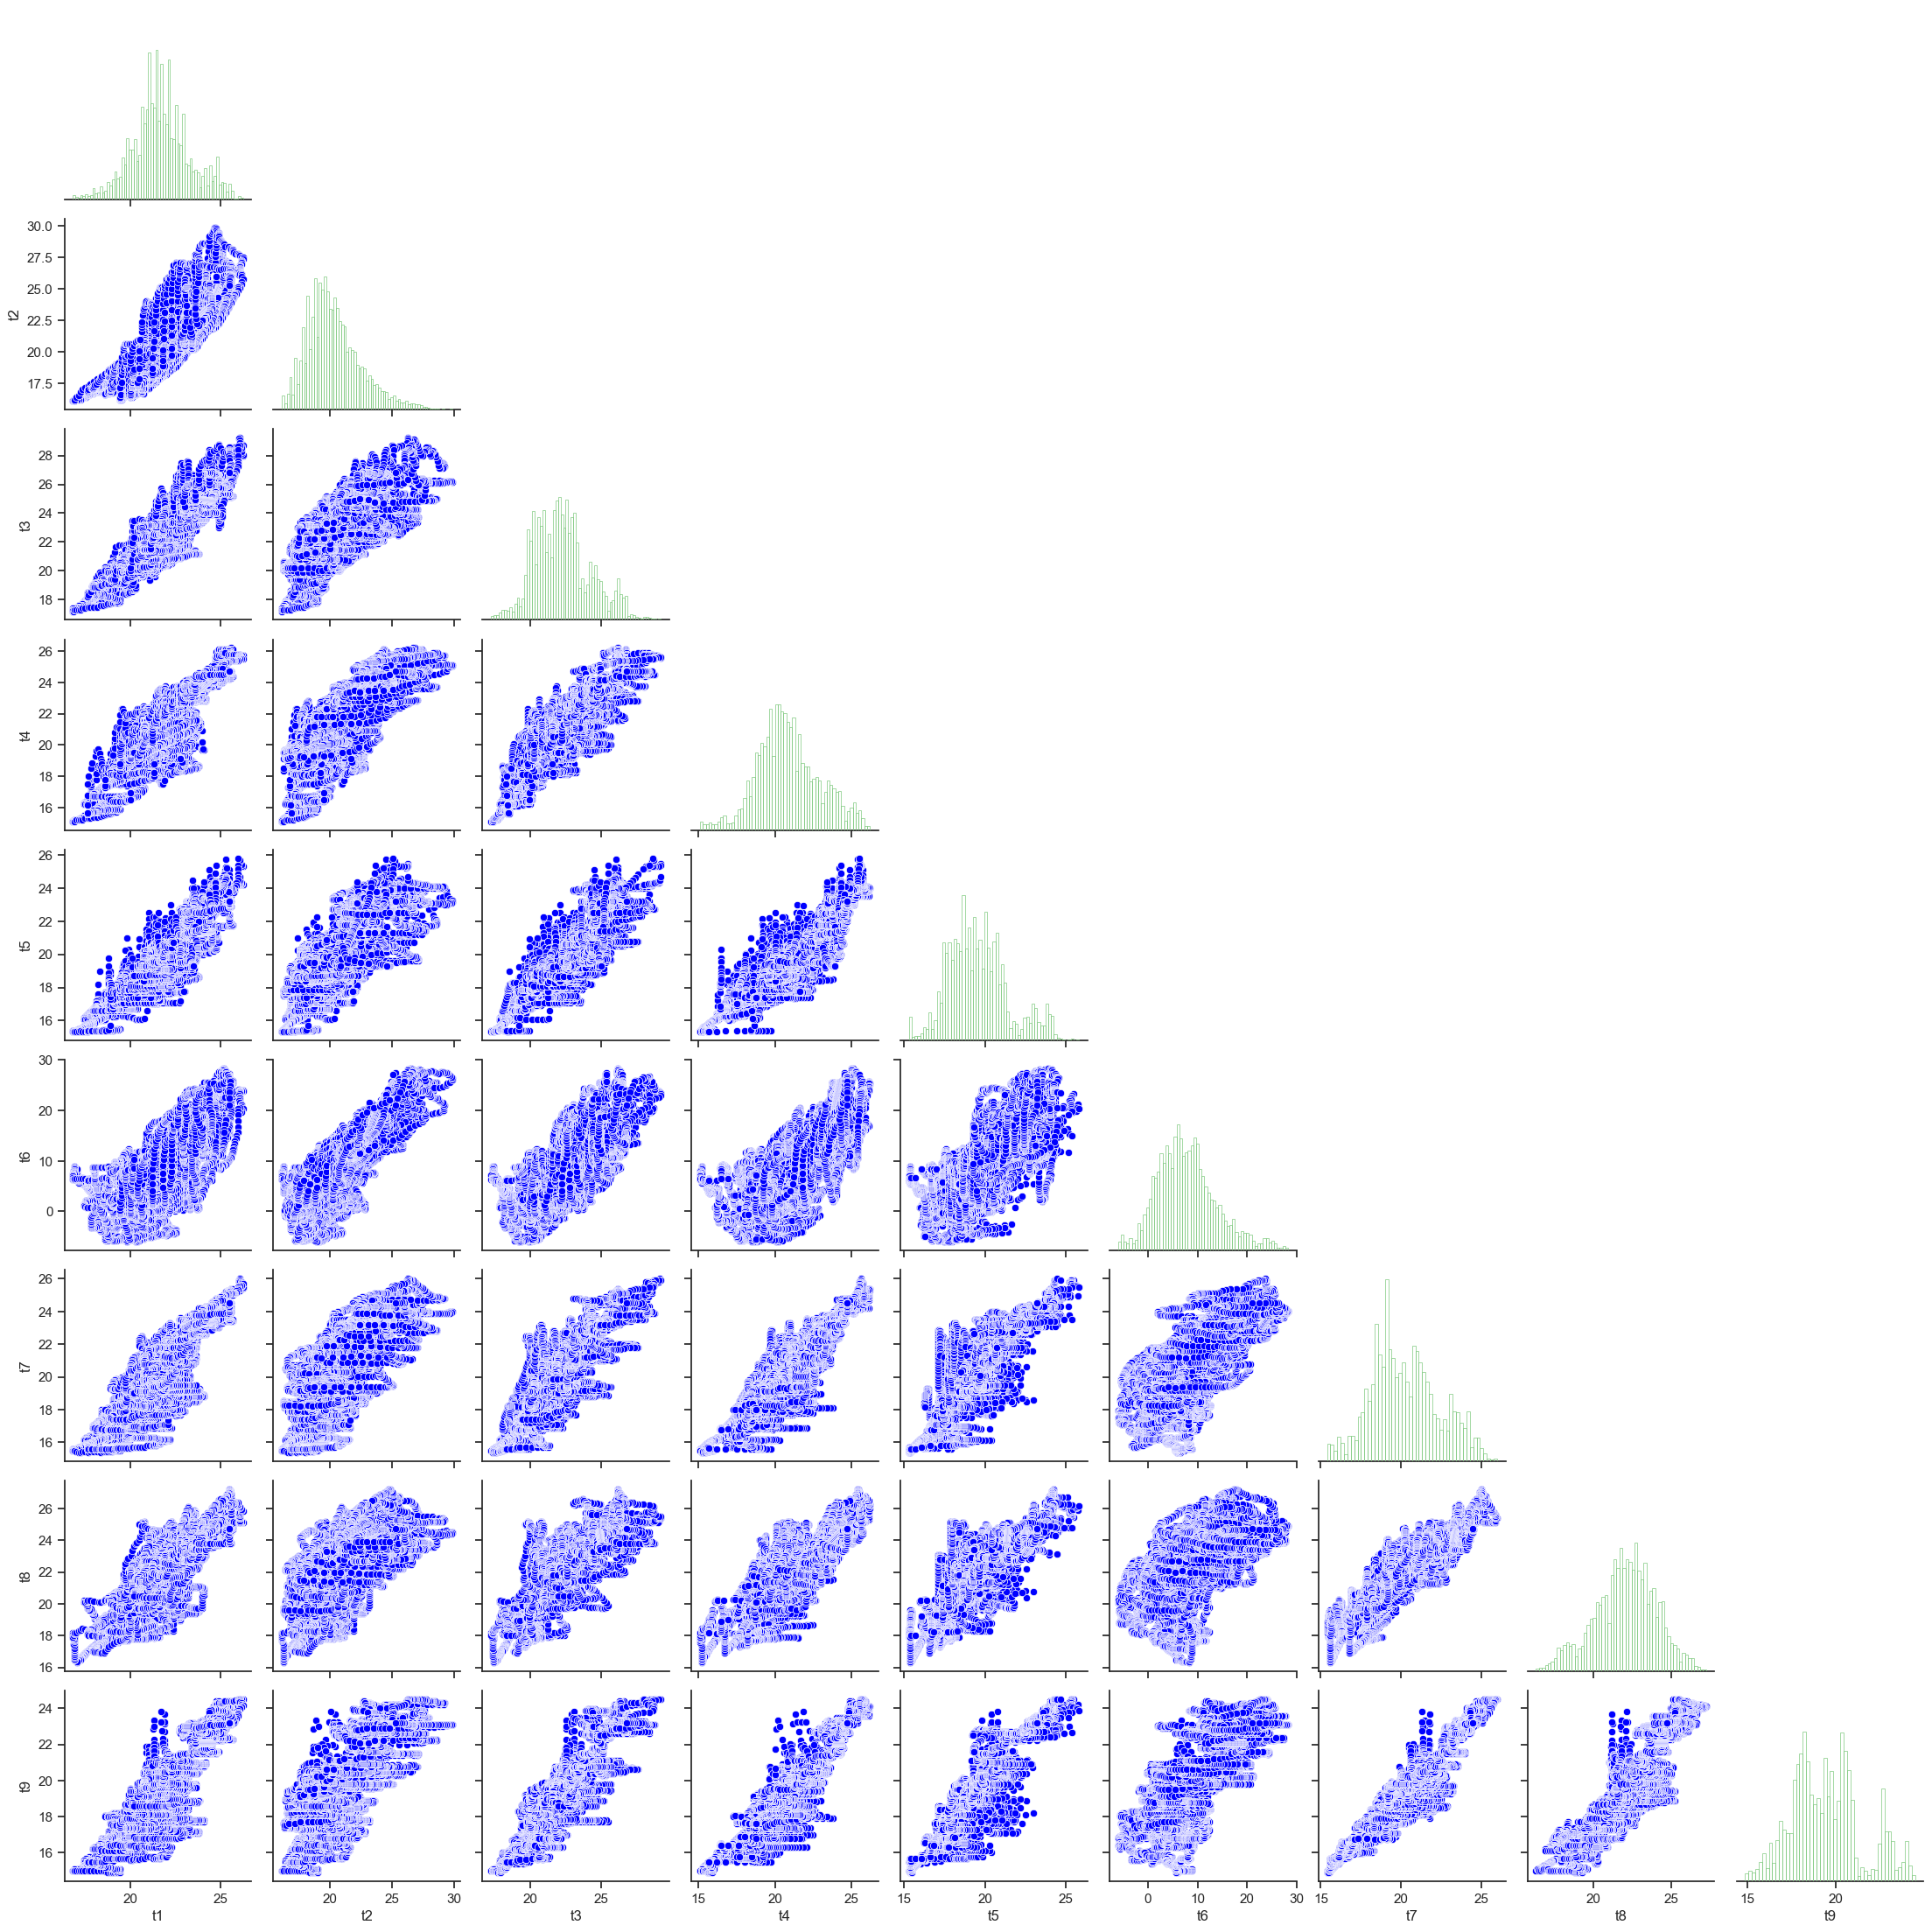

In [33]:
sns.pairplot(
    energy_df[temp_params],
    plot_kws=dict(marker="o", color = 'blue', linewidth=0.5),
    diag_kws=dict(fill=False), corner=True, 
)

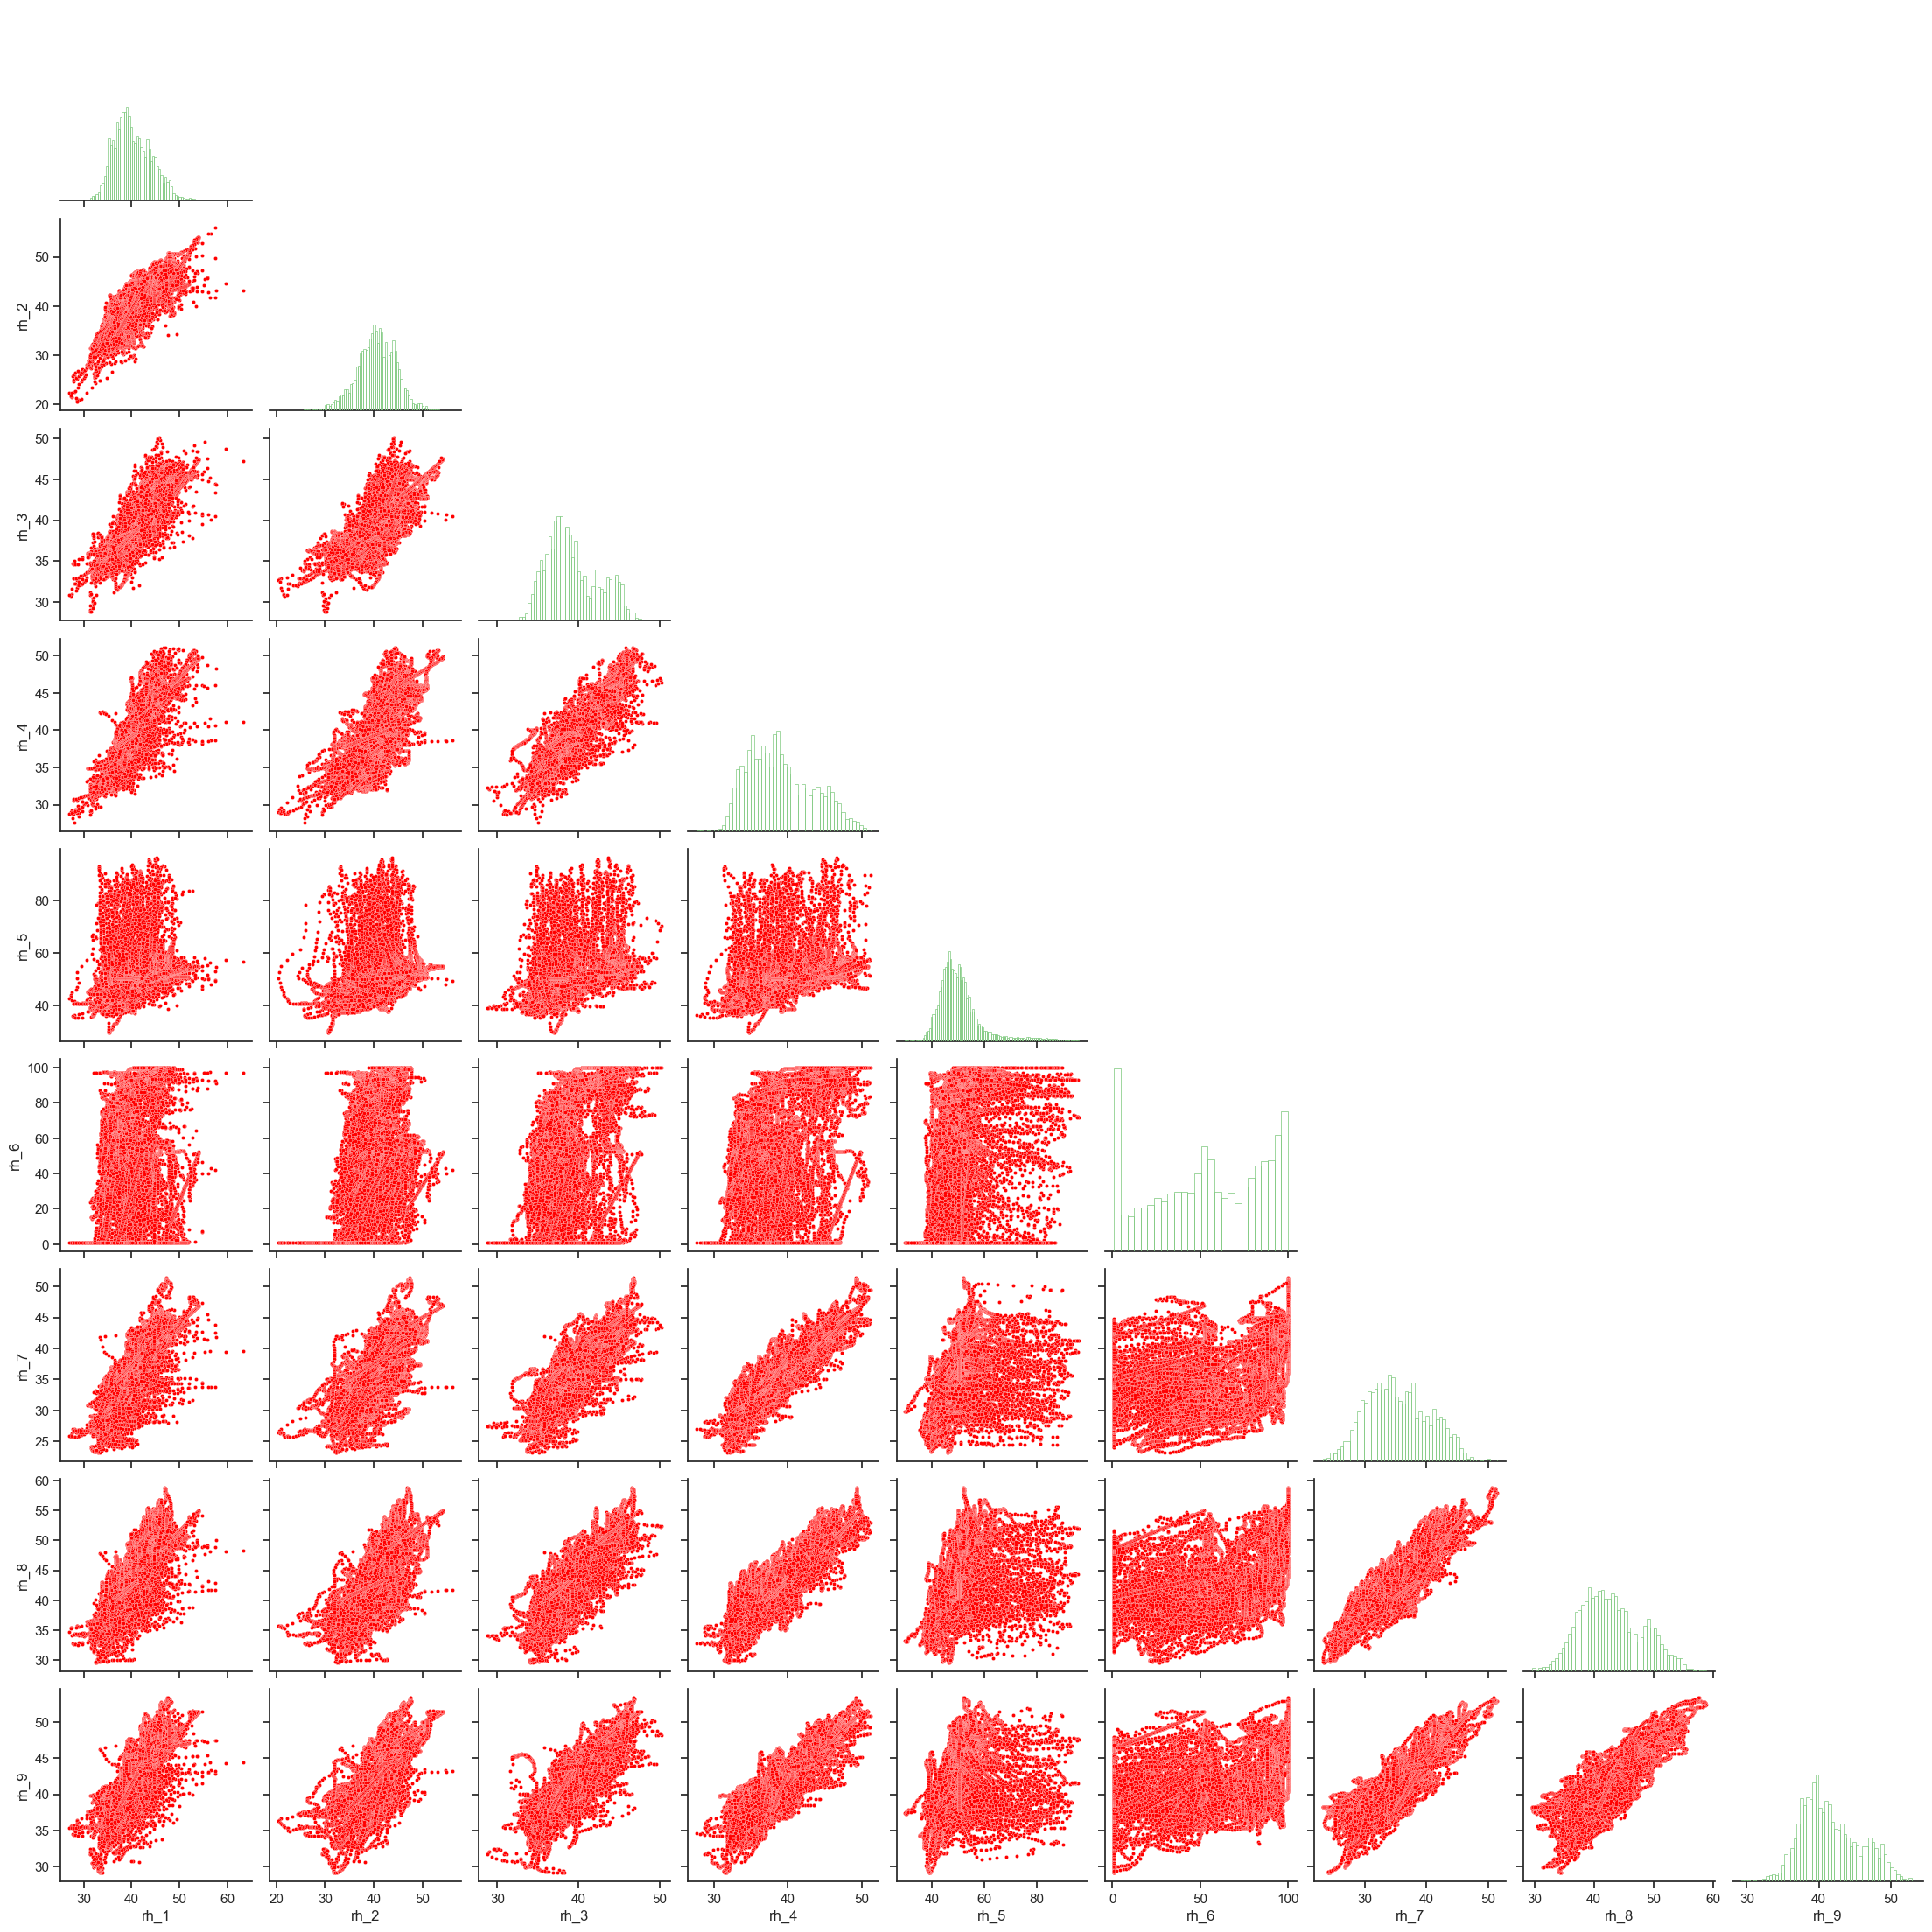

In [34]:
sns.pairplot(
    energy_df[hum_params],
    plot_kws=dict(marker=".", color = 'red', linewidth=0.2),
    diag_kws=dict(fill=False), corner=True, 
)

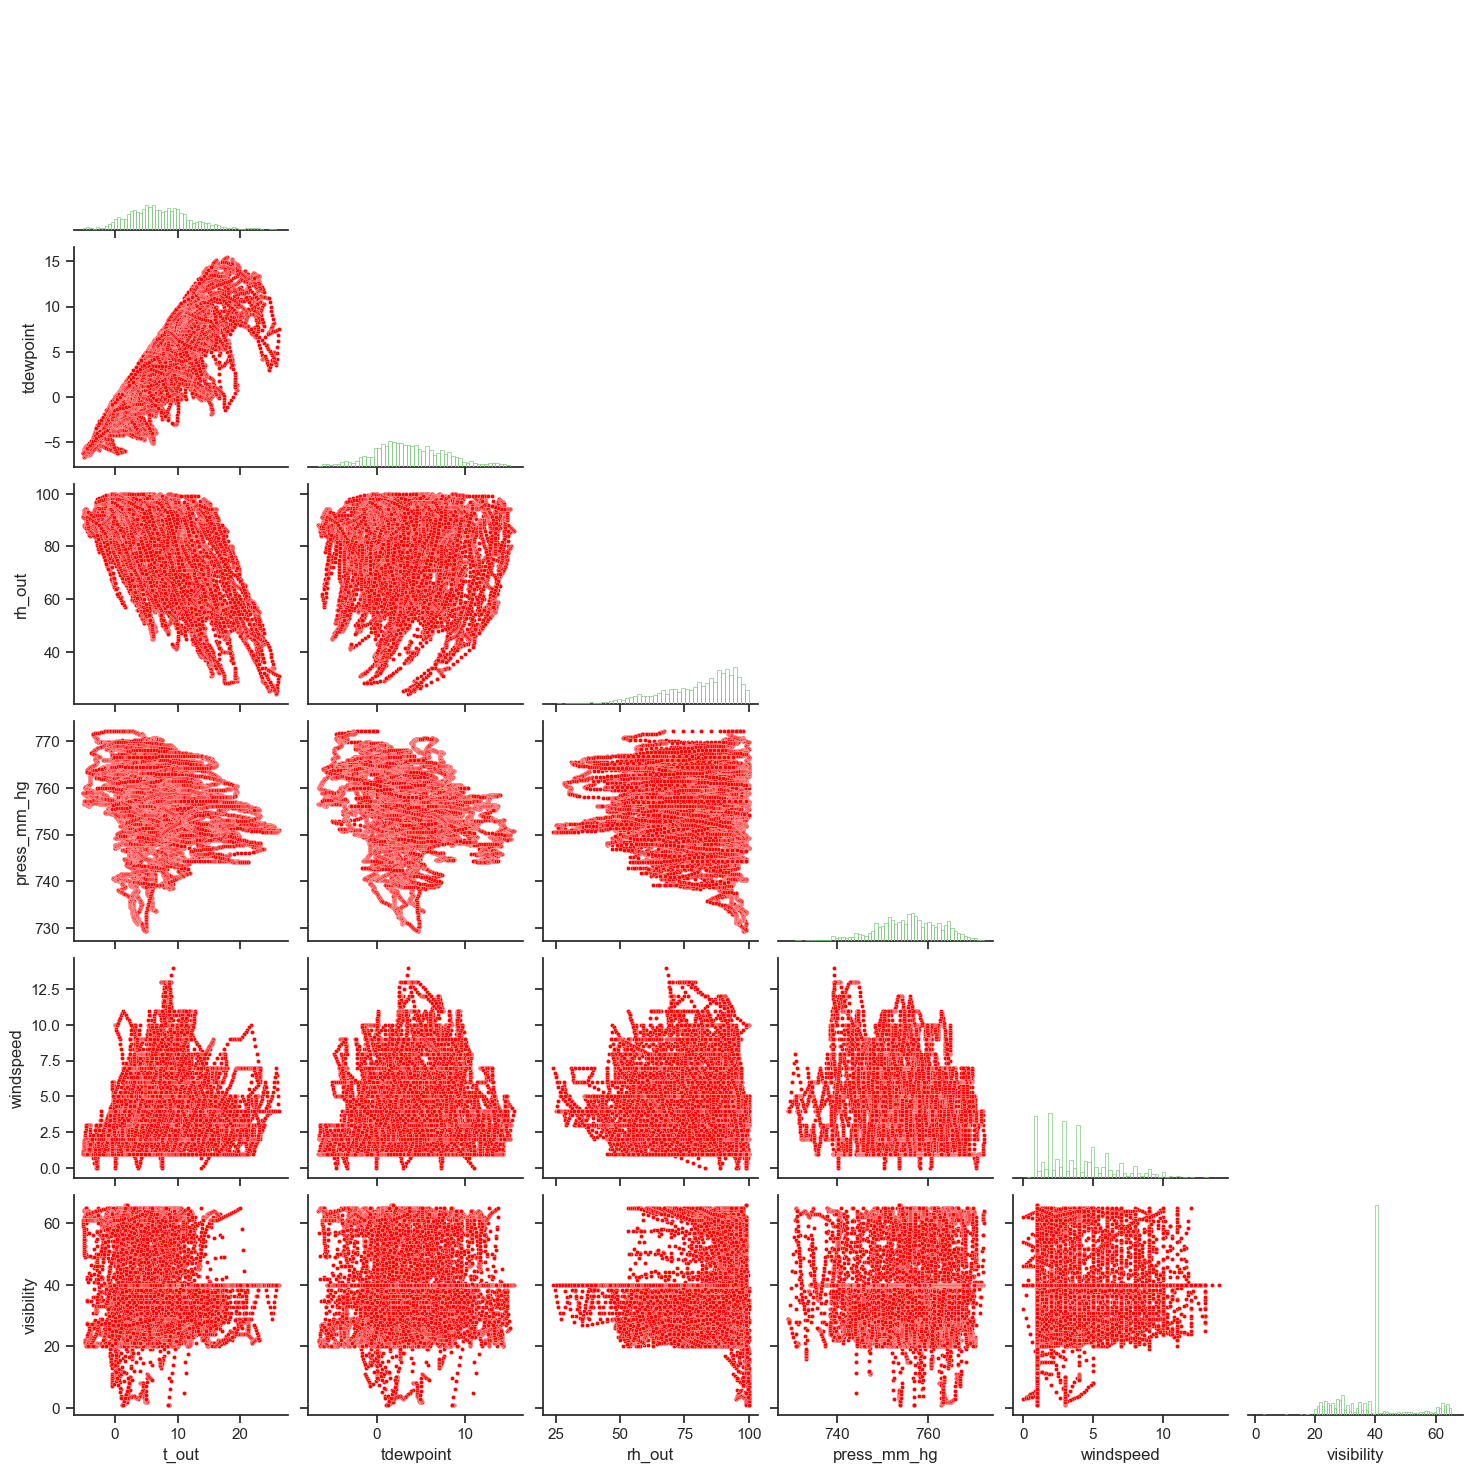

In [35]:
sns.pairplot(
    energy_df[weather_params],
    plot_kws=dict(marker=".", color = 'red', linewidth=0.2),
    diag_kws=dict(fill=False), corner=True, 
)

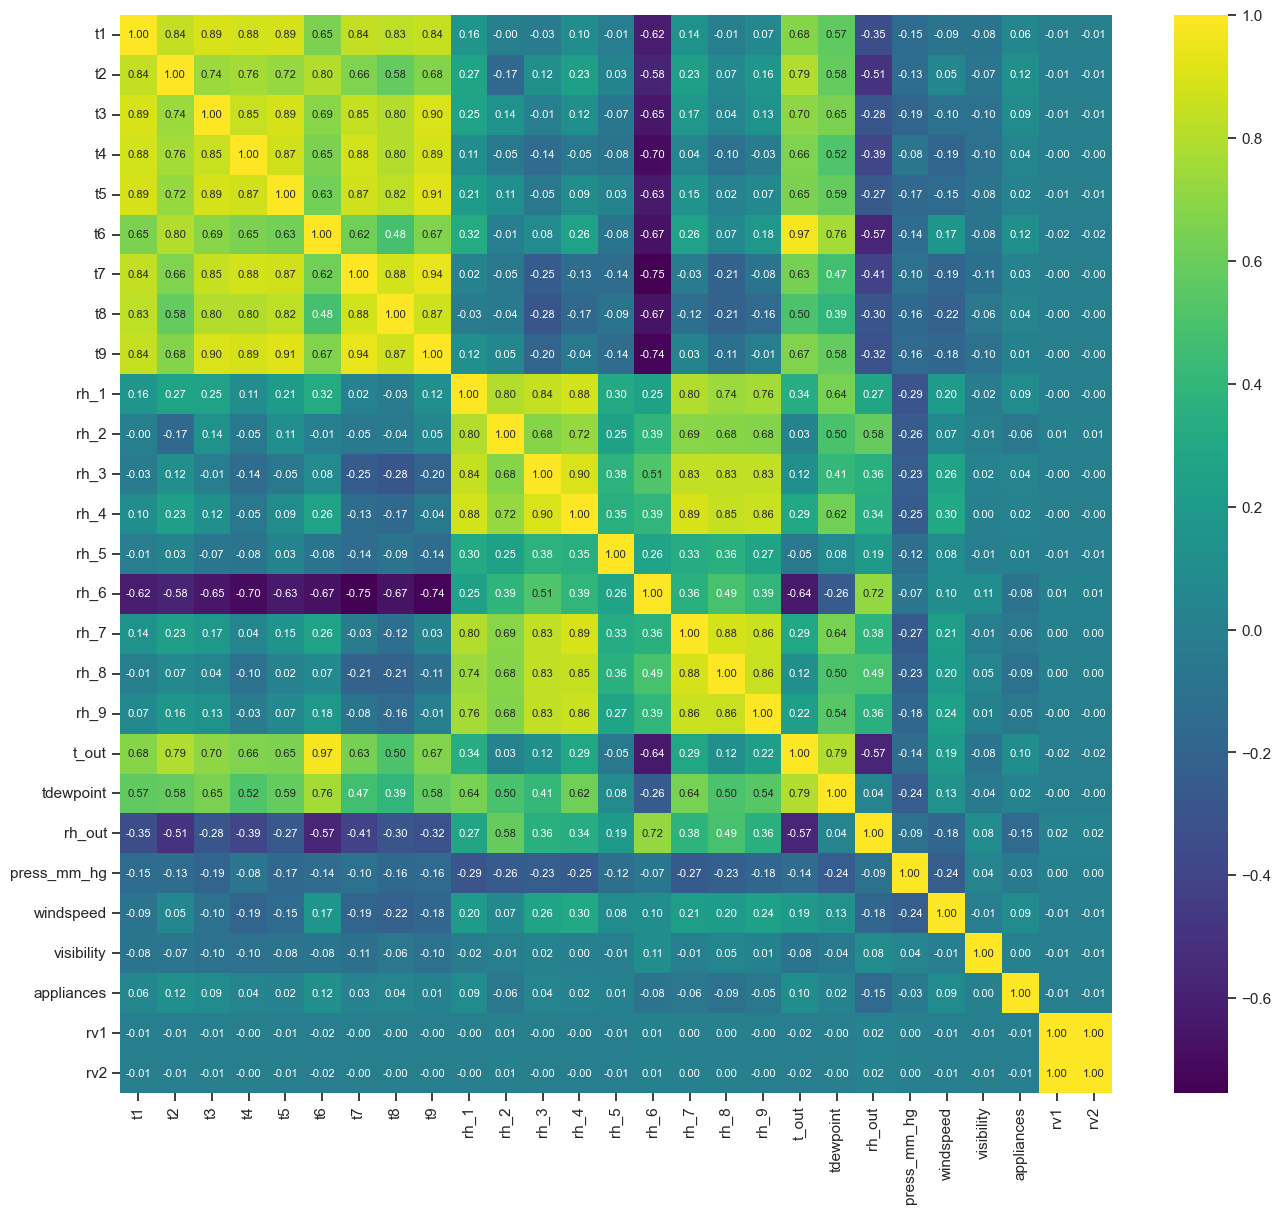

In [36]:
plt.subplots(figsize=(16, 14))
dataplot = sns.heatmap(energy_df[temp_params + hum_params + weather_params +target+random_params].corr(), 
    cmap="viridis", annot=True, fmt=".2f", annot_kws={"size": 8})
  
# displaying heatmap
plt.show()

Some features are highly correlated. rv1, rv2, t6, t_out, t3, t5, t7 and t9 are all highly correlated.

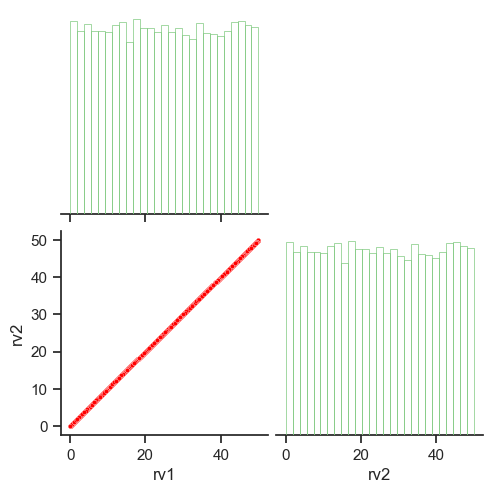

In [37]:
sns.pairplot(
    energy_df[random_params],
    plot_kws=dict(marker=".", color = 'red', linewidth=0.2),
    diag_kws=dict(fill=False), corner=True, 
)

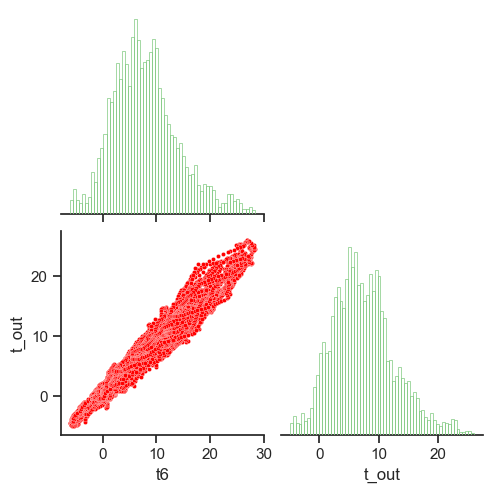

In [38]:
sns.pairplot(
    energy_df[['t6', 't_out']],
    plot_kws=dict(marker=".", color = 'red', linewidth=0.2),
    diag_kws=dict(fill=False), corner=True, 
)

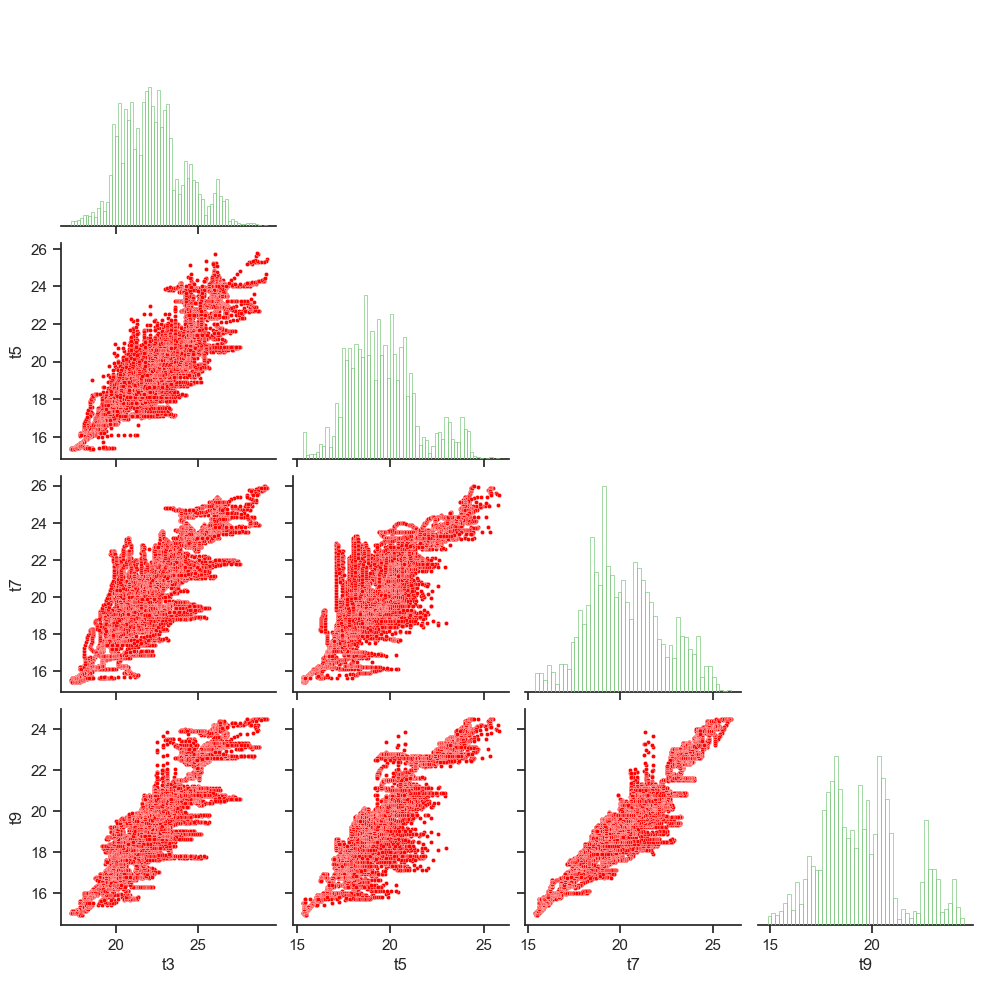

In [39]:
sns.pairplot(
    energy_df[['t3', 't5', 't7', 't9']],
    plot_kws=dict(marker=".", color = 'red', linewidth=0.2),
    diag_kws=dict(fill=False), corner=True, 
)

<div id='exploratory-data-analysis'
     style = "display: fill;
              border-radius: 10px;
              background-color: #6867AC;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">7. Machine Learning
    </h2>
</div>

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">7.1 Splitting Data
    </h3>
</div> 

In [43]:
### Selecting features for ML training.

temp_params = ["t1", "t2", "t3", "t4", "t5", "t7", "t8",]

hum_params = ["rh_1", "rh_2", "rh_3", "rh_4", "rh_5", "rh_6", "rh_7", "rh_8", "rh_9"]

weather_params = ["t_out", "tdewpoint", "rh_out", "press_mm_hg",
                "windspeed", "visibility"]

date_params = ['date_dow', 'date_dom', 'date_doy', 'date_hr', 'date_min', 'date_wkoyr', 'date_mth', 'date_qtr',]

target = ["appliances"]

In [48]:

df_full_train, df_test = train_test_split(energy_df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log(df_train[target].values).ravel()
y_val = np.log(df_val[target].values).ravel()
y_test = np.log(df_test.appliances.values).ravel()

del df_train['appliances']
del df_val['appliances']
del df_test['appliances']

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">7.2 One Hot Encoding
    </h3>
</div> 

In [49]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[temp_params + hum_params + weather_params + date_params].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[temp_params + hum_params + weather_params + date_params].to_dict(orient='records')
X_val = dv.transform(val_dict)

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">7.3 Trying out different regression algorithm with default parameters
    </h3>
</div> 

In [50]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('XGB', xgb.XGBRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=5, random_state=40, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.240169 (0.015384)
Ridge: 0.240055 (0.015002)
Lasso: 0.073485 (0.004237)
CART: 0.385762 (0.030074)
RF: 0.660308 (0.011073)
GB: 0.437608 (0.004691)
XGB: 0.610535 (0.010411)


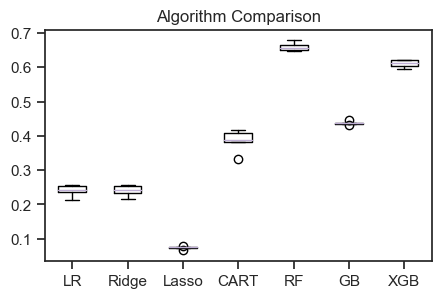

In [51]:
plt.figure(figsize=(5,3))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

We start with the three algorithms with the best R2 score

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">7.4 Gradient Boosting Tuning
    </h3>
</div> 

In [52]:
depths = [1, 2, 3, 4, 5, 6, 10, None]

for depth in depths:
    gb_model = GradientBoostingRegressor(max_depth =depth, random_state = 5)
    gb_model.fit(X_train, y_train)
    gb_pred = gb_model.predict(X_val)
    rmse = mean_squared_error(y_val, gb_pred, squared = False)
    r2s = r2_score(y_val, gb_pred)

    print('%4s -> %.3f -> %.3f' % (depth, rmse, r2s))

   1 -> 0.551 -> 0.283
   2 -> 0.517 -> 0.370
   3 -> 0.492 -> 0.428
   4 -> 0.466 -> 0.489
   5 -> 0.446 -> 0.530
   6 -> 0.424 -> 0.576
  10 -> 0.383 -> 0.655
None -> 0.481 -> 0.454


Max depth 6 and 10 have low rmse. Next we proceed to find the learning rate.

In [53]:
scores = []

for depth in [6, 10,]:
    for s in [0.01, 0.1, 1]:
        gb_model = GradientBoostingRegressor(max_depth=depth, learning_rate=s, random_state=5)
        gb_model.fit(X_train, y_train)

        gb_pred = gb_model.predict(X_val)
        rmse = mean_squared_error(y_val, gb_pred, squared = False)
        r2s = r2_score(y_val, gb_pred)
        
        scores.append((depth, s, rmse, r2s))

In [54]:
columns = ['max_depth', 'learning rate', 'rmse', 'r2_score']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='learning rate', columns=['max_depth'], values=['rmse', 'r2_score'])
df_scores_pivot.round(3)

rmse        r2_score       
max_depth         6      10       6      10
learning rate                              
0.01           0.525  0.474    0.349  0.470
0.10           0.424  0.383    0.576  0.655
1.00           0.501  0.528    0.407  0.343

<AxesSubplot: xlabel='None-max_depth', ylabel='learning rate'>

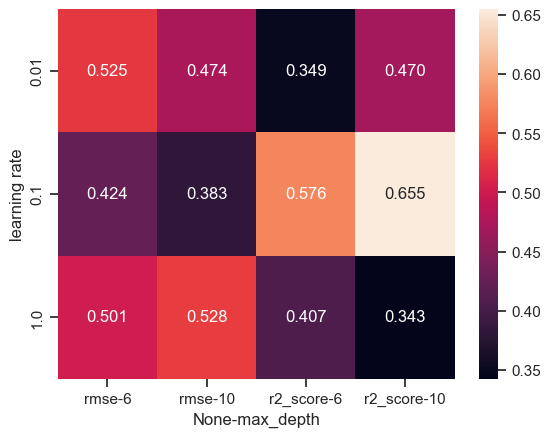

In [55]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

the best paramters here are max depth = 10 and learning rate = 0.1 for Gradient boosting.

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">7.5 Random Forest Tuning
    </h3>
</div> 

CPU times: user 5min 32s, sys: 2.43 s, total: 5min 35s
Wall time: 5min 43s


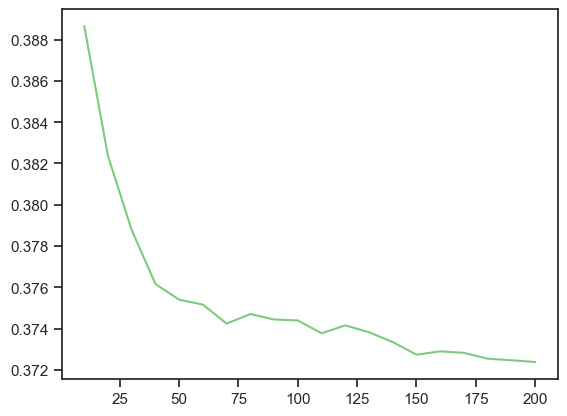

In [56]:
%%time
scores = []

for n in range(10, 201, 10):
    rf_model = RandomForestRegressor(n_estimators=n, random_state=5)
    rf_model.fit(X_train, y_train)

    rf_pred = rf_model.predict(X_val)
    rmse = mean_squared_error(y_val, rf_pred, squared = False)
    r2s = r2_score(y_val, rf_pred)
    
    scores.append((n, rmse, r2s))


df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse', 'r2s'])
plt.plot(df_scores.n_estimators, df_scores.rmse)

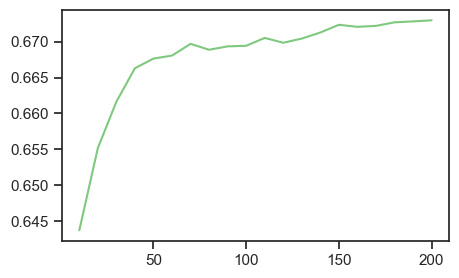

In [57]:
plt.figure(figsize=(5,3))
plt.plot(df_scores.n_estimators, df_scores.r2s)
plt.show()

### Finding the max depth

CPU times: user 9min 14s, sys: 2.47 s, total: 9min 17s
Wall time: 9min 29s


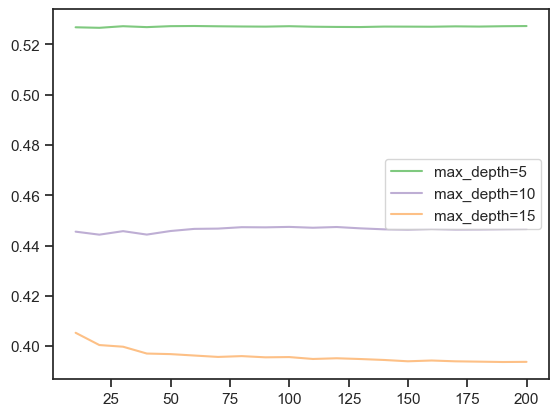

In [59]:
%%time
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf_model = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=5)
        rf_model.fit(X_train, y_train)

        rf_pred = rf_model.predict(X_val)
        rmse = mean_squared_error(y_val, rf_pred, squared = False)
        r2s = r2_score(y_val, rf_pred)
    
        scores.append((d, n, rmse, r2s))

columns = ['max_depth', 'n_estimators', 'rmse', 'r2s']
df_scores = pd.DataFrame(scores, columns=columns)

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

In [60]:
%%time

max_depth = 10

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf_model = RandomForestRegressor(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=5)
        rf_model.fit(X_train, y_train)

        rf_pred = rf_model.predict(X_val)
        rmse = mean_squared_error(y_val, rf_pred, squared = False)
        r2s = r2_score(y_val, rf_pred)

        scores.append((s, n, rmse, r2s))

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 8.34 µs


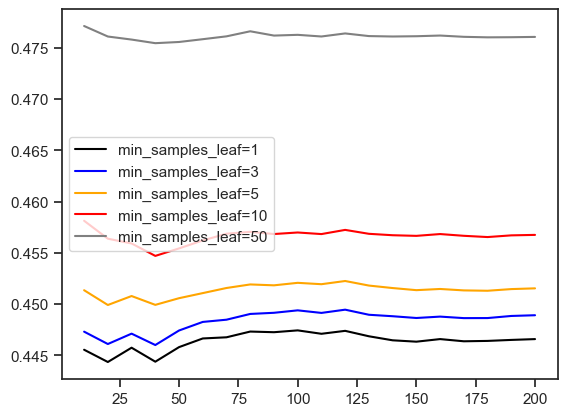

In [61]:
columns = ['min_samples_leaf', 'n_estimators', 'rmse', 'r2s']
df_scores = pd.DataFrame(scores, columns=columns)

colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [62]:
min_sample_leaf = 1
max_depth = 15
n_estimators = 200
rf_model = RandomForestRegressor(min_samples_leaf = min_sample_leaf, max_depth = max_depth, n_estimators = n_estimators, random_state=5)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_val)
rmse = mean_squared_error(y_val, rf_pred, squared = False)
r2s = r2_score(y_val, rf_pred)
print(f'rmse: {rmse}, r2 score: {r2s}')

rmse: 0.3937456967731953, r2 score: 0.6343658741358345


Random forest consumes lots of memmory during parameter tuning. The RMSE at max depth of 15 is high comapred to Gradient Boosting.

Hence, will use Gradient Boosting to train the full model.

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">7.6 Final Training
    </h3>
</div> 

In [63]:
l_r = 0.1
depth = 10

gb_model = GradientBoostingRegressor(max_depth=depth, learning_rate=l_r, random_state=5)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_val)
rmse = mean_squared_error(y_val, gb_pred, squared = False)
r2s = r2_score(y_val, gb_pred)

print(f'rmse: {rmse}, r2 score: {r2s}')

rmse: 0.38255844769731623, r2 score: 0.6548477766350547


In [64]:
l_r = 0.1
depth = 10

train_full_dict = df_full_train[temp_params + hum_params + weather_params + date_params].to_dict(orient='records')
y_train_full = np.log(df_full_train.appliances.values).ravel()

X_train_full = dv.transform(train_full_dict)

test_dict = df_test[temp_params + hum_params + weather_params + date_params].to_dict(orient='records')
X_test = dv.transform(test_dict)

gb_model = GradientBoostingRegressor(max_depth=depth, learning_rate=l_r, random_state=5)
gb_model.fit(X_train_full, y_train_full)

gb_pred = gb_model.predict(X_test)
rmse = mean_squared_error(y_test, gb_pred, squared = False)
r2s = r2_score(y_test, gb_pred)

print(f'rmse: {rmse}, r2 score: {r2s}')

rmse: 0.3668255929294031, r2 score: 0.6993901307003142


In [ ]:
## saving model
output_file = f'model_lr={lr}.bin'

with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

print(f'the model is saved to {output_file}')


<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;">Additional - Generating sample for prediction
    </h3>
</div> 

In [65]:
import json
request = df_test[temp_params + hum_params + weather_params + date_params].iloc[0].to_dict()
print(json.dumps(request, indent=4))

{
    "t1": 18.963333333333296,
    "t2": 18.29,
    "t3": 19.89,
    "t4": 18.5,
    "t5": 17.79,
    "t7": 18.1,
    "t8": 19.29,
    "rh_1": 42.09,
    "rh_2": 41.29,
    "rh_3": 43.2,
    "rh_4": 41.79,
    "rh_5": 64.6233333333333,
    "rh_6": 93.1266666666667,
    "rh_7": 42.09,
    "rh_8": 51.09,
    "rh_9": 46.03,
    "t_out": 2.86666666666667,
    "tdewpoint": 1.68333333333333,
    "rh_out": 92.3333333333333,
    "press_mm_hg": 753.733333333333,
    "windspeed": 5.16666666666667,
    "visibility": 30.0,
    "date_dow": 3.0,
    "date_dom": 14.0,
    "date_doy": 14.0,
    "date_hr": 2.0,
    "date_min": 10.0,
    "date_wkoyr": 2.0,
    "date_mth": 1.0,
    "date_qtr": 1.0
}


<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;"> Saving the model with BentoML
    </h3>
</div> 

In [ ]:
bentoml.sklearn.save_model(
    'energy_predictor',
    gb_model,
    custom_objects={
        'dictVectorizer': dv
    })

<div id='checking-null-values'
     style = "display: fill;
              border-radius: 10px;
              background-color: #A267AC;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align:left;
                 font-family: Trebuchet MS;"> Testing the model with API
    </h3>
</div> 

In [67]:
import requests

url = "http://10.1.16.229:9696/predict"

In [68]:
appliance = {
    "t1": 18.963333333333296,
    "t2": 18.29,
    "t3": 19.89,
    "t4": 18.5,
    "t5": 17.79,
    "t7": 18.1,
    "t8": 19.29,
    "rh_1": 42.09,
    "rh_2": 41.29,
    "rh_3": 43.2,
    "rh_4": 41.79,
    "rh_5": 64.6233333333333,
    "rh_6": 93.1266666666667,
    "rh_7": 42.09,
    "rh_8": 51.09,
    "rh_9": 46.03,
    "t_out": 2.86666666666667,
    "tdewpoint": 1.68333333333333,
    "rh_out": 92.3333333333333,
    "press_mm_hg": 753.733333333333,
    "windspeed": 5.16666666666667,
    "visibility": 30.0,
    "date_dow": 3.0,
    "date_dom": 14.0,
    "date_doy": 14.0,
    "date_hr": 2.0,
    "date_min": 10.0,
    "date_wkoyr": 2.0,
    "date_mth": 1.0,
    "date_qtr": 1.0
}
requests.post(url, json = appliance).json()

{'prediction': 3.6683321342476187, 'value': 39.18649351547281}